# Tensorflow Practice

This notebook contains our practice work in training a neural network to do binary classification.


In [24]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import random
import pandas
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np
import matplotlib.pyplot as plt

Run this python file to generate all the datasets used:

In [25]:
%run -i 'build_simple_example.py'

In [26]:
# These tests are all binary classifiers, so the number of labels = 2
num_labels = 2

In [27]:
# Use the method to draw the image
def draw_image(x_data):
    x_0 = []
    x_1 = []
    y_0 = []
    y_1 = []

    for row in x_data:
        x = row[2]
        y = row[3]
        color = row[4]
        if color == 0:
            x_0.append(x)
            y_0.append(y)
        else:
            x_1.append(x)
            y_1.append(y)

    plt.scatter(x_0, y_0, c = "red")
    plt.scatter(x_1, y_1, c = "blue")

    plt.axis('equal')
    plt.show()

In [28]:
def generate_dataset(filename):
    col_names = ['ts','user','x_coordinate','y_coordinate','color', 'label']
    data = pandas.read_csv(filename, names = col_names, header=None, skiprows=1)

    return data

In [29]:
def extract_data(filename, num_labels):
    data = generate_dataset(filename)
    dim = data.ts.values.shape[0]
    dataset_x = np.concatenate((data.ts.values.reshape(dim,1),
                              data.user.values.reshape(dim,1),
                              data.x_coordinate.values.reshape(dim,1),
                              data.y_coordinate.values.reshape(dim,1),
                              data.color.values.reshape(dim,1)), axis=1)
    dataset_y = np.zeros((dim,num_labels))
    for i in range(dim):
        dataset_y[i][data.label.values[i]] = 1
    return dataset_x, dataset_y, dataset_x.shape[0]

In [30]:
def create_training_and_testing_sets(x_data, y_data, shape, num_test_points):
    test_indexes = random.sample(range(0, shape), num_test_points )


    train_indexes = np.setdiff1d(list(range(0,shape)),test_indexes)
    train_x = x_data[train_indexes]
    train_y = y_data[train_indexes]

    test_x = x_data[test_indexes]
    test_y = y_data[test_indexes]

    return train_x, train_y, test_x, test_y

When we built our model, we tried a lot of different things.
For our weights, we randomly assigned them based on a normal distribution with a standard deviation of 0.01. We tried changing this standard deviation and found the best result was with 0.01 but it was not a very significant accuracy improvement. We also tried adding a second hidden layer, but it did not change the accuracy.

In [50]:
def build_model():
    x = tf.placeholder(tf.float32, shape=(None, 5), name='x')    
    y = tf.placeholder(tf.float32, shape=(None, num_labels), name='y') 
    
    W1 = tf.Variable(tf.random_normal([5, 4], stddev = 0.01), name='W1')
    b1 = tf.Variable(tf.random_normal([4], stddev = 0.01), name='b1')
    
    W2 = tf.Variable(tf.random_normal([4, 2], stddev = 0.01), name='W2')
    b2 = tf.Variable(tf.random_normal([2], stddev = 0.01), name='b2')
    
    W_out = tf.Variable(tf.random_normal([2, num_labels], stddev=0.01), name='W_out')
    b_out = tf.Variable(tf.random_normal([num_labels], stddev = 0.01), name='b_out')

    
    hidden_out = tf.add(tf.matmul(x, W1), b1)
    hidden_out = tf.nn.relu(hidden_out)
    
    hidden_out2 = tf.add(tf.matmul(hidden_out, W2), b2)
    hidden_out2 = tf.nn.relu(hidden_out2)
    
    logits = tf.add(tf.matmul(hidden_out2, W_out), b_out)
    prediction = tf.nn.softmax(logits)
    y_clipped = tf.clip_by_value(prediction, 1e-10, 0.9999999)
    
    loss = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped) + (1 - y) * tf.log(1 - y_clipped), axis=1))
    
    train_op = tf.train.GradientDescentOptimizer(learning_rate = 0.01).minimize(loss)
    init = tf.global_variables_initializer()

    correct_prediction = tf.equal(tf.argmax(prediction, 1, name="Argmax_Pred"), tf.argmax(y, 1, name="Y_Pred"), name="Correct_Pred")
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32, name="Cast_Corr_Pred"), name="Accuracy")
    
    return x, y, init, train_op, loss, accuracy

In [60]:
def run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y):

    with tf.Session() as sess:
        sess.run(init)
        feed_dict = {x: train_x, y: train_y}
        test_dict = {x: test_x, y: test_y}
        
        error_increases = 0
        old_loss = 0
        for i in range(20):
            #print('EPOCH', i)
            _, loss_val = sess.run([train_op, loss], feed_dict)
            
            if i % 1000 == 0:
                print("loss:", loss_val)
        
        print("Training Accuracy:", sess.run( accuracy, feed_dict))
        print("Testing Accuracy:", sess.run( accuracy, test_dict))
        
        
        for i in range(0, len(tf.trainable_variables())):
            print((tf.trainable_variables())[i])
            print((tf.trainable_variables())[i].eval())
            print()
            print()            
            print()            
            print()   
        

The first dataset tested is two solid colored blocks placed to the left and the right of each other. The image is 100x100 pixels.

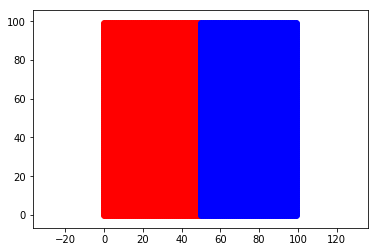

In [11]:
data_x, data_y, shape = extract_data('two_blocks_lr.txt', num_labels)

# Randomly take 9000 pixels to test on. The training set is only 1000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 9000)
draw_image(data_x)

First, we trained and ran the data on the entire dataset, then tested on the entire dataset. We ran 2000 Epochs and printed the loss every 1000 epochs.
We did this 20 times.

In [12]:
for i in range(1):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, data_x, data_y, data_x, data_y)
    

Iteration:  0
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
loss: 1.3138673
loss: 0.40285686
Training Accuracy: 0.9834
Testing Accuracy: 0.9834
Iteration:  1
loss: 1.3795977
loss: 0.4107583
Training Accuracy: 0.9097
Testing Accuracy: 0.9097
Iteration:  2
loss: 1.3984808
loss: 0.41163695
Training Accuracy: 0.9122
Testing Accuracy: 0.9122
Iteration:  3
loss: 1.3513399
loss: 0.40976068
Training Accuracy: 0.9114
Testing Accuracy: 0.9114
Iteration:  4
loss: 1.3914944
loss: 0.40904132
Training Accuracy: 0.9108
Testing Accuracy: 0.9108
Iteration:  5
loss: 1.3776042
loss: 0.40500522
Training Accuracy: 0.9835
Testing Accuracy: 0.9835
Iteration:  6
loss: 1.4004954
loss: 0.40995932
Training Accuracy: 0.9086
Testing Accuracy: 0.9086
Iteration:  7
loss: 1.393941
loss: 0.40375465
Training Accuracy: 0.984
Testing Accuracy: 0.984
Iteration:  8
loss: 1.3735456
loss: 0.40601766
Training Accuracy: 0.984
Testing Accuracy: 0.984
Iter

Aftwards, we extracted 9000 datapoints for testing and trained on 1000

In [14]:
sess

NameError: name 'sess' is not defined

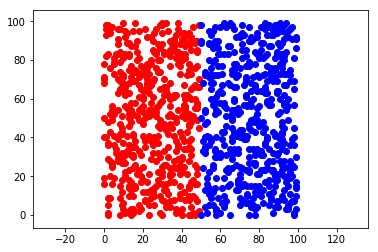

In [13]:
draw_image(train_x)

In [14]:
for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y)

Iteration:  0
loss: 1.4159116
loss: 0.39862922
Training Accuracy: 0.911
Testing Accuracy: 0.917
Iteration:  1
loss: 1.3779237
loss: 0.3940402
Training Accuracy: 0.982
Testing Accuracy: 0.9778889
Iteration:  2
loss: 1.378389
loss: 0.39460242
Training Accuracy: 0.982
Testing Accuracy: 0.97744447
Iteration:  3
loss: 1.3789707
loss: 0.3935081
Training Accuracy: 0.982
Testing Accuracy: 0.9776667
Iteration:  4
loss: 1.4004109
loss: 0.40027794
Training Accuracy: 0.909
Testing Accuracy: 0.9161111
Iteration:  5
loss: 1.365199
loss: 0.39400104
Training Accuracy: 0.982
Testing Accuracy: 0.9761111
Iteration:  6
loss: 1.360635
loss: 0.392596
Training Accuracy: 0.982
Testing Accuracy: 0.978
Iteration:  7
loss: 1.3777261
loss: 0.39381084
Training Accuracy: 0.982
Testing Accuracy: 0.9773333
Iteration:  8
loss: 1.4058796
loss: 0.3987022
Training Accuracy: 0.908
Testing Accuracy: 0.9152222
Iteration:  9
loss: 1.37722
loss: 0.39268312
Training Accuracy: 0.986
Testing Accuracy: 0.98044443
Iteration:  10
l

Next we also tested with the two colors on top of each other and on two opposite sides of a diagonal.

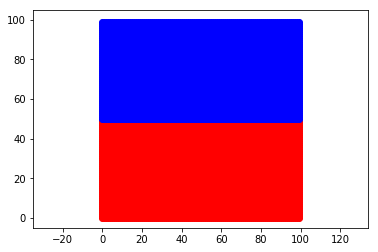

In [15]:
data_x, data_y, shape = extract_data('two_blocks_tb.txt', num_labels)

# Randomly take 9000 pixels to test on. The training set is only 1000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 9000)
draw_image(data_x)

In [16]:
for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, data_x, data_y, data_x, data_y)

Iteration:  0
loss: 1.3759518
loss: 0.40943286
Training Accuracy: 0.9109
Testing Accuracy: 0.9109
Iteration:  1
loss: 1.4012954
loss: 0.4052122
Training Accuracy: 0.9841
Testing Accuracy: 0.9841
Iteration:  2
loss: 1.3643445
loss: 0.41513208
Training Accuracy: 0.9095
Testing Accuracy: 0.9095
Iteration:  3
loss: 1.3822191
loss: 0.4056404
Training Accuracy: 0.984
Testing Accuracy: 0.984
Iteration:  4
loss: 1.3952708
loss: 0.4036928
Training Accuracy: 0.9851
Testing Accuracy: 0.9851
Iteration:  5
loss: 1.3947557
loss: 0.40357408
Training Accuracy: 0.9841
Testing Accuracy: 0.9841
Iteration:  6
loss: 1.4056766
loss: 0.40380317
Training Accuracy: 0.9847
Testing Accuracy: 0.9847
Iteration:  7
loss: 1.3674237
loss: 0.41721475
Training Accuracy: 0.9114
Testing Accuracy: 0.9114
Iteration:  8
loss: 1.3716996
loss: 0.4031547
Training Accuracy: 0.985
Testing Accuracy: 0.985
Iteration:  9
loss: 1.3804631
loss: 0.40487382
Training Accuracy: 0.9836
Testing Accuracy: 0.9836
Iteration:  10
loss: 1.39212

Diagonal:

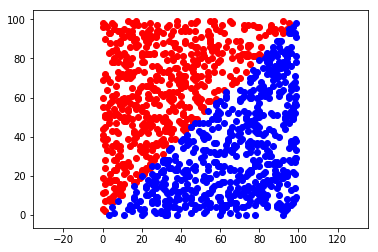

In [140]:
data_x, data_y, shape = extract_data('two_blocks_diag.txt', num_labels)

# Randomly take 9000 pixels to test on. The training set is only 1000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 9000)
draw_image(train_x)

In [142]:
for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy,train_x, train_y, test_x, test_y )

Iteration:  0
loss: 1.3507522
loss: 0.060109925
Training Accuracy: 0.9881818
Testing Accuracy: 0.9892222
Iteration:  1
loss: 1.4207096
loss: 0.062251836
Training Accuracy: 0.9881818
Testing Accuracy: 0.9902222
Iteration:  2
loss: 1.3802321
loss: 0.05985636
Training Accuracy: 0.9881818
Testing Accuracy: 0.98933333
Iteration:  3
loss: 1.387581
loss: 0.059598334
Training Accuracy: 0.9881818
Testing Accuracy: 0.9892222
Iteration:  4
loss: 1.4081017
loss: 0.05959494
Training Accuracy: 0.9881818
Testing Accuracy: 0.9892222
Iteration:  5
loss: 1.3832333
loss: 0.05958324
Training Accuracy: 0.9881818
Testing Accuracy: 0.98933333
Iteration:  6
loss: 1.4039774
loss: 0.05968848
Training Accuracy: 0.9881818
Testing Accuracy: 0.9892222
Iteration:  7
loss: 1.3709445
loss: 0.06225088
Training Accuracy: 0.9881818
Testing Accuracy: 0.9901111
Iteration:  8
loss: 1.3997668
loss: 0.05988766
Training Accuracy: 0.9881818
Testing Accuracy: 0.9892222
Iteration:  9
loss: 1.3878275
loss: 0.062123545
Training Acc

We next tried a image where the number of red and blue dots was not the same.

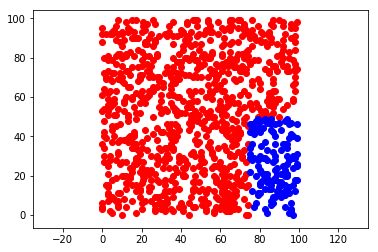

Iteration:  0
loss: 1.4364377
loss: 0.3499504
Training Accuracy: 0.926
Testing Accuracy: 0.9392222
Iteration:  1
loss: 1.3974874
loss: 0.35248014
Training Accuracy: 0.92
Testing Accuracy: 0.934
Iteration:  2
loss: 1.3516394
loss: 0.35091057
Training Accuracy: 0.962
Testing Accuracy: 0.9587778
Iteration:  3
loss: 1.414971
loss: 0.3482216
Training Accuracy: 0.922
Testing Accuracy: 0.9355556
Iteration:  4
loss: 1.4422592
loss: 0.35717916
Training Accuracy: 0.955
Testing Accuracy: 0.954
Iteration:  5
loss: 1.3439388
loss: 0.35328358
Training Accuracy: 0.921
Testing Accuracy: 0.93344444
Iteration:  6
loss: 1.2891791
loss: 0.35343868
Training Accuracy: 0.911
Testing Accuracy: 0.927
Iteration:  7
loss: 1.3131402
loss: 0.346944
Training Accuracy: 0.92
Testing Accuracy: 0.93277776
Iteration:  8
loss: 1.4034268
loss: 0.34569293
Training Accuracy: 0.958
Testing Accuracy: 0.9545556
Iteration:  9
loss: 1.4665034
loss: 0.34926686
Training Accuracy: 0.963
Testing Accuracy: 0.96
Iteration:  10
loss: 1

In [143]:
data_x, data_y, shape = extract_data('corner_color.txt', num_labels)

# Randomly take 9000 pixels to test on. The training set is only 1000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 9000)
draw_image(train_x)

for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y )

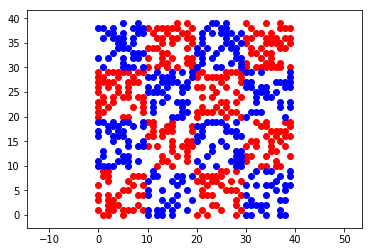

Iteration:  0
loss: 1.3874474
loss: 0.9931606
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  1
loss: 1.3888959
loss: 1.0548548
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  2
loss: 1.3910882
loss: 1.0633695
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  3
loss: 1.3840473
loss: 1.0516864
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  4
loss: 1.3901113
loss: 1.0023196
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  5
loss: 1.3884748
loss: 0.99569845
Training Accuracy: 0.96666664
Testing Accuracy: 0.974
Iteration:  6
loss: 1.3858262
loss: 1.0016807
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  7
loss: 1.3877584
loss: 0.9996063
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  8
loss: 1.3863953
loss: 1.0598629
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  9
loss: 1.3862959
loss: 1.0623719
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  10
loss: 1.3860385
loss: 1.041093
Training Accuracy: 1.0
Testing Acc

In [144]:
data_x, data_y, shape = extract_data('checkerboard_big.txt', num_labels)

# Randomly take 1000 pixels to test on. The training set is only 600
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 1000)
draw_image(train_x)

for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y )

The checkerboard seems to be really easy and gets 100% accuracy almost all the time, even though it is more complicated than the other patterns.

We then tested a checkerboard that had gaps within it and it still had extremely good results.

800


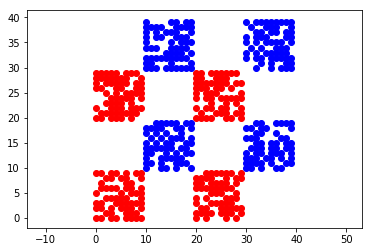

Iteration:  0
loss: 1.3904954
loss: 0.61919725
Training Accuracy: 0.986
Testing Accuracy: 0.99333334
Iteration:  1
loss: 1.388801
loss: 0.76798856
Training Accuracy: 0.848
Testing Accuracy: 0.85
Iteration:  2
loss: 1.38734
loss: 0.6191046
Training Accuracy: 0.986
Testing Accuracy: 0.99
Iteration:  3
loss: 1.3761032
loss: 0.78183377
Training Accuracy: 0.858
Testing Accuracy: 0.87333333
Iteration:  4
loss: 1.3865979
loss: 0.61821645
Training Accuracy: 0.986
Testing Accuracy: 0.99
Iteration:  5
loss: 1.3824471
loss: 0.6270792
Training Accuracy: 0.988
Testing Accuracy: 0.99333334
Iteration:  6
loss: 1.3797973
loss: 0.7810064
Training Accuracy: 0.86
Testing Accuracy: 0.87333333
Iteration:  7
loss: 1.3913155
loss: 0.6172248
Training Accuracy: 0.986
Testing Accuracy: 0.99
Iteration:  8
loss: 1.3870474
loss: 0.7721905
Training Accuracy: 0.86
Testing Accuracy: 0.87333333
Iteration:  9
loss: 1.3806859
loss: 0.61035556
Training Accuracy: 1.0
Testing Accuracy: 1.0
Iteration:  10
loss: 1.3949951
lo

In [150]:
data_x, data_y, shape = extract_data('checkerboard_weird.txt', num_labels)
print(shape)
# Randomly take 300 pixels to test on. The training set is only 500
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 300 )
draw_image(train_x)

for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y )

We tried one more time with a 50x50 square in the middle of a bunch of other points. 

10000


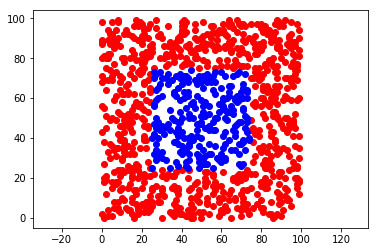

Iteration:  0
loss: 1.377446
Training Accuracy: 0.762
Testing Accuracy: 0.74866664
<tf.Variable 'W1:0' shape=(5, 128) dtype=float32_ref>
[[-7.89398886e-03 -1.18395255e-03  1.77043919e-02 -6.48400094e-03
  -4.80337068e-03  9.33467876e-03 -6.30305987e-03 -4.18506563e-03
  -2.93511641e-03  1.17536336e-02 -6.11565588e-03  8.99018894e-04
   1.20007414e-02 -3.70892137e-03  5.42909373e-03  6.92593819e-03
  -7.63005484e-03 -1.31561039e-02  8.26819451e-04 -5.60206082e-03
  -1.09064672e-02 -6.60310918e-03 -8.96212924e-03 -9.06075537e-03
   8.91247578e-03 -4.89822682e-03  7.40583660e-03 -1.51782352e-02
  -1.74470041e-02  2.38423198e-02  8.22286645e-04  1.65230909e-03
  -3.57615785e-03  7.32315751e-03  5.65014640e-03  2.92595965e-03
  -7.40342354e-03 -2.78238743e-03 -6.14829129e-03  9.35231037e-06
  -4.02761565e-04  8.56704544e-03 -1.32891675e-02  9.11847968e-03
  -3.58412322e-03 -2.02311133e-03  9.60015692e-04  1.55635197e-02
  -4.31362214e-03  8.26257002e-03  4.43560909e-03  1.58046968e-02
  -1.

[ 7.5275940e-03 -1.3630084e-03 -1.2598928e-03 -1.1893756e-02
 -9.0011433e-03  6.8900094e-04 -5.0291204e-04 -2.0384348e-03
  8.1755109e-03 -6.7324709e-04 -3.7055167e-03 -4.0482241e-03
  1.2051647e-02  1.0916635e-03  7.7966251e-03  8.9274505e-03
 -4.5413799e-03 -2.1943122e-02  1.1689458e-03 -3.1165122e-03
 -2.8105122e-03  1.8098229e-03 -4.1764737e-03  2.7822919e-02
  2.0876296e-02  1.1718509e-02 -1.3384808e-02  1.3897891e-02
 -9.7325509e-03  8.0862315e-03 -7.2204000e-03  1.0304997e-02
 -1.4317989e-03 -9.3269832e-03  4.4207834e-03  4.5145783e-03
 -1.3384782e-02 -2.3193113e-03  7.9513546e-03 -2.9337281e-04
  1.0413170e-02  9.1582211e-03  1.1755236e-02  1.3129637e-03
 -1.2641994e-03  1.2962511e-03  5.0170282e-03  1.7674241e-02
 -8.3366204e-03 -8.8179400e-03 -7.7423050e-05 -1.7735936e-02
 -4.4331099e-03  5.5274805e-03  1.0828925e-02 -1.1122683e-02
 -8.8966815e-03 -2.6159966e-03 -2.1014402e-04 -4.0797773e-03
 -6.3150786e-03 -5.4412624e-03  5.3073275e-03 -1.6231554e-02
  3.0994182e-03  6.58182

[-0.00935445 -0.00104732  0.00841546  0.00726061 -0.00094559 -0.00391521
 -0.00591594 -0.01147033  0.00801392 -0.00878192  0.00294897 -0.0131302
 -0.00243707 -0.00133455 -0.01452176  0.00539757  0.00663644 -0.01392486
  0.0011944   0.01369124  0.00488896 -0.00373376 -0.02142242  0.00914664
 -0.00805927  0.01992929 -0.00403082  0.0233915   0.00245057  0.0057842
  0.00364469 -0.00998606 -0.00441282  0.00675344  0.00346301  0.0164222
 -0.00036484  0.00950891 -0.00961894  0.00444016 -0.01761013 -0.00039287
  0.01241406  0.00617889  0.00139878  0.01725774  0.00606861  0.00215891
  0.00828895 -0.00255949  0.01681895 -0.02529982  0.00918183  0.00059906
 -0.0042909  -0.01304719 -0.00355286 -0.00204944  0.0055945   0.00048576
  0.00517743  0.01922021  0.00685566  0.00398202 -0.01552264  0.02190729
  0.00187746  0.00174716  0.01740599 -0.0133182  -0.00414811  0.003165
 -0.00387697 -0.00736773  0.0119853   0.00678264 -0.01072466  0.00657612
  0.01545632  0.00049928 -0.01057567 -0.0176747  -0.0044

[-1.99319504e-04 -3.92228877e-03 -1.85582489e-02 -8.62099187e-05
 -1.32043462e-03 -5.81618398e-03 -9.16071050e-03 -5.93917258e-03
 -3.34530347e-03 -5.78240491e-03  2.85766600e-03 -7.61024002e-03
  3.50781064e-03  1.40523184e-02 -1.48942014e-02 -5.85113326e-03
  4.18783026e-03  9.15528554e-03  1.39633091e-02 -1.53910171e-03
 -2.04022974e-02 -1.59130637e-02  1.59059640e-03 -1.03530837e-02
 -1.58954673e-02  1.67971756e-02  2.86774547e-03  1.06588530e-03
  4.72684950e-03  1.24058872e-02 -2.46781437e-03  6.40159659e-03
  2.48600263e-03 -5.20417746e-03  6.35404745e-03 -2.72490829e-03
 -2.38083163e-03  1.26511580e-03 -1.95337110e-03  1.07458269e-03
  8.79142154e-03 -7.19986949e-03  1.21154971e-02 -1.80618633e-02
 -2.08578128e-02  7.88715202e-03  1.09218638e-02 -7.89625850e-03
  8.50723684e-03  1.27331149e-02 -2.51260623e-02 -1.83829702e-02
 -2.18567345e-03  1.06364395e-02 -1.17023597e-02  8.06297734e-03
  4.92014317e-03  3.98734910e-03 -1.12479925e-02  4.30126302e-03
  3.79545061e-04 -4.24915

[ 7.00872997e-03 -7.41918059e-03  1.92159228e-02 -1.38438935e-03
 -8.29662103e-03 -1.23461820e-02 -7.89259560e-03 -2.58891517e-03
 -1.47390496e-02  1.24385972e-02 -8.33647791e-03 -6.38002204e-03
 -1.64890269e-04  1.09718535e-02  5.94828790e-03 -3.38828610e-03
  1.37909930e-02  1.97970346e-02  1.35335070e-03 -1.29034324e-02
 -9.02832486e-03 -2.56031454e-02 -3.00657307e-03  1.21113490e-02
 -7.04657799e-03 -2.92678759e-03  1.01129687e-03  7.02316174e-04
 -1.64610287e-03 -9.89880227e-03  1.56412069e-02  8.94109625e-03
 -1.36815784e-02 -4.60908096e-03 -2.47112825e-03 -1.23390378e-02
 -5.70174400e-03 -2.29831878e-03 -2.24588043e-03  3.10955773e-04
  9.85085685e-03 -3.58395744e-04  4.42256499e-03  5.68787847e-03
  1.22444583e-02  7.06512807e-03 -2.80688703e-02 -6.09730603e-03
  1.07257254e-02 -1.41492710e-02 -1.08811248e-03  3.73456464e-03
 -3.69469402e-03  4.44656151e-04  6.89152163e-03  1.60002895e-03
 -1.91054353e-03 -4.51046089e-03 -1.51674775e-02  7.58391479e-03
 -5.58311492e-03 -1.20250

[ 0.01315631  0.00128798  0.00465457 -0.00640953 -0.01242526  0.01970414
  0.00902647  0.00881166 -0.00363772 -0.01553972  0.00542161 -0.00081992
  0.00076166 -0.00768917 -0.01436133 -0.00579182  0.00319344 -0.01440148
  0.01460929 -0.00404445  0.00188898 -0.00657436  0.00535556  0.00300215
 -0.00562082  0.00481083 -0.00607088 -0.00071668  0.00300762  0.00193022
 -0.01502634 -0.02027724  0.01656245 -0.01939242 -0.00113023  0.00867366
 -0.00908506  0.00067997 -0.01395191 -0.01216473 -0.00086559  0.01012322
 -0.00482242  0.00723153  0.01716731 -0.00411067  0.00766368  0.01934406
  0.01394492 -0.01325965  0.02600295 -0.01216276 -0.02147873 -0.0051851
  0.01096478  0.01321675  0.00238519  0.00985137 -0.00341501 -0.0026052
 -0.00074096  0.00046023  0.01330576  0.00072575 -0.01098478  0.00205767
 -0.00752052  0.00451119 -0.00353289  0.01164498  0.00510131 -0.00593017
  0.00324141 -0.00175606  0.01788414 -0.00367987 -0.01056266 -0.00859925
  0.00730673  0.00132373  0.00907205  0.00542297 -0.0

[-1.54207097e-02 -4.74018417e-03 -3.41005786e-03  7.46710040e-03
  1.11475391e-02 -9.59632080e-03  8.65200942e-04 -4.43709781e-03
  3.23928264e-03 -2.30400052e-04 -7.23136403e-03 -3.99685604e-03
  4.64058388e-03  1.15718814e-02  3.16411140e-03  8.57454631e-03
  2.37900321e-03  2.23034713e-02 -8.75510462e-03  1.31708486e-02
  1.38753522e-02  2.71113520e-03 -6.22266764e-03  1.12976925e-03
 -1.54968612e-02 -1.33870514e-02  1.87787842e-02 -9.91889834e-03
 -5.72392531e-03  1.26730436e-02 -1.00564668e-02  1.25840064e-02
  7.93658849e-03  2.58500292e-03 -1.62797272e-02  3.45392572e-03
  4.12848173e-03  1.15137240e-02  6.30569470e-04 -1.89450075e-04
 -1.09751318e-02  1.89105533e-02  4.03953576e-03  2.47451030e-02
 -7.40834046e-03 -6.30977331e-03  3.40813547e-02 -1.08952904e-02
 -1.21426899e-02  1.60964970e-02  3.91166843e-03  9.15054418e-03
  7.75608327e-03 -1.49853679e-03  1.30014699e-02  9.97247547e-03
  2.94555630e-05 -5.60988532e-03 -1.05520338e-03 -2.15466693e-02
 -1.09168859e-02  8.20004

[-0.00167505 -0.00774207  0.00108184  0.01068311  0.01010908 -0.01134631
 -0.01123348  0.00250179 -0.00909124 -0.00710741  0.00191465  0.00436314
  0.00810683 -0.00358259 -0.00664796 -0.00571252 -0.00421349  0.00428046
  0.01688644 -0.0242211  -0.00057379 -0.00207079 -0.0082307  -0.00792564
 -0.00538288 -0.01000045 -0.01336316 -0.01019266  0.01028757 -0.00482783
  0.0019232   0.01783567 -0.00886759 -0.01928019  0.01052501  0.00596574
 -0.00346793 -0.01825163 -0.00691496 -0.00985307 -0.00158263 -0.01348354
 -0.01410983  0.01729182  0.00519478 -0.00570486  0.01434973 -0.00781362
  0.00250953 -0.01051298  0.00480269  0.00133968  0.00171145  0.01434944
  0.01679333  0.0084728  -0.01046917  0.00232595 -0.01032565  0.00111347
 -0.00268997 -0.00624207 -0.00686032 -0.02209445  0.00023742  0.00889928
 -0.00546105  0.008799   -0.00051319 -0.01082942  0.00840721  0.02476311
  0.00639308 -0.01070808  0.00456208 -0.00187186 -0.00166951  0.0148816
  0.00310612  0.01094192 -0.02655171 -0.01558998 -0.

[-3.16418312e-03  1.19315051e-02 -5.40392706e-03 -6.01676013e-03
  7.79783074e-03  6.74499618e-03  1.87449623e-02 -9.06531233e-03
 -5.16398577e-03 -1.75988907e-03  7.21779233e-03  9.05997062e-04
 -7.79701630e-03 -6.57679001e-03  5.41217858e-03 -3.41592036e-04
 -1.32839167e-02 -3.69877508e-03 -1.14045886e-03  1.21020945e-03
  5.11894096e-03 -1.07107088e-02  3.13751996e-02 -1.17652304e-02
  5.45983203e-03  1.95119940e-02 -7.27123581e-03 -7.50676612e-04
 -2.06878199e-03  6.71997492e-04 -3.54540534e-04 -2.25318186e-02
 -7.19013205e-03 -8.01373553e-03  3.61343520e-03 -7.16980686e-03
 -4.44903562e-04 -1.54634693e-03  1.97348762e-02  1.25001632e-02
 -3.55718657e-03  1.52695936e-03 -8.43407866e-03  3.98142450e-03
  5.40259003e-04 -1.45962117e-02 -4.10652981e-04 -2.24082265e-03
 -2.72426382e-03 -4.46262537e-03 -3.20425211e-03 -6.91385567e-03
  5.26994374e-03  3.05878930e-03  1.00035090e-02  1.67913083e-02
  1.20854592e-02 -7.65852630e-03 -4.00369382e-03  1.62085351e-02
  1.38912722e-02  1.02730

[-1.59055684e-02 -1.85730122e-02  2.07578074e-02 -1.47702144e-02
  6.29066629e-03  1.41397417e-02 -1.30421519e-02 -9.26982705e-03
  1.38719091e-02  2.51149051e-02  1.51592121e-02 -5.15571749e-03
  2.05858168e-03  6.95458706e-03  1.67862382e-02 -1.38567640e-02
 -7.20987096e-04 -1.40887708e-03  9.79804993e-03 -4.03462123e-04
  9.36829951e-03 -3.80094367e-04  2.31553875e-02  8.75475816e-04
 -1.68476813e-02  1.36885494e-02 -5.36911597e-04  8.01583286e-03
 -8.19542725e-03 -1.14015061e-02  1.67708267e-02  1.91215165e-02
 -2.84784753e-03 -5.91704343e-03 -3.72610032e-03  8.63341708e-03
 -1.03900218e-02 -2.29155039e-03 -9.92929097e-03 -1.20406318e-02
  2.09499132e-02  8.58216546e-03 -1.15553327e-02 -2.71370215e-03
 -6.90952921e-03 -1.51317613e-03  1.06133986e-02 -2.02307198e-03
  9.77041852e-03  2.34427117e-03  1.18550165e-02  4.32627229e-03
 -1.14585338e-02 -1.18916463e-02 -1.77029311e-03  2.12936406e-03
  6.75613526e-03  2.31895559e-02 -2.62859976e-03 -8.90527014e-03
 -1.85956282e-03  9.53834

[ 1.69316325e-02  1.02414824e-02  1.25158085e-02  5.46079082e-03
  6.21411856e-03 -1.06518418e-02 -7.02973409e-03 -3.31037166e-03
 -1.13569861e-02 -5.34333475e-03 -7.64242513e-03 -1.09902455e-03
 -1.14276225e-03 -1.01227174e-02  8.37064814e-03  5.63868321e-03
  1.44844279e-02 -1.51593322e-02 -7.34061759e-05  1.08465822e-02
  7.71405268e-03 -7.96760619e-03  1.29330624e-02  8.22795928e-03
 -5.09537291e-04 -1.40700638e-02  1.01730730e-02 -2.60408921e-03
  2.20230198e-03  1.26003819e-02  1.28735909e-02 -1.02903310e-03
  8.39183689e-04 -6.10697689e-03 -6.90584444e-03 -3.25986347e-03
  1.34720765e-02  1.10537829e-02  1.85344350e-02  6.80854777e-03
 -5.92162414e-03 -2.28587650e-02  2.11985298e-02 -1.70727365e-03
 -2.61177984e-03 -2.69018626e-03 -8.33713543e-03 -1.36445172e-03
  1.82731748e-02  9.31467116e-03 -1.60896648e-02 -4.09338903e-03
  8.39692249e-04  1.56905986e-02 -6.03542244e-03 -6.94728876e-03
  8.83127935e-03 -1.67935691e-03  1.08011672e-02  9.36320424e-03
  2.82077380e-02 -1.28264

[-1.07001364e-02 -5.89234941e-03  1.18677586e-03 -4.30527655e-03
 -1.49000727e-04  1.51457833e-02  1.51306521e-02  4.82566189e-03
  1.64438486e-02 -1.60427243e-02 -6.22185878e-04  1.10047432e-02
 -2.54745260e-02 -1.01447443e-03 -1.00395246e-03  6.50552753e-03
  1.77826099e-02  6.48492808e-03  8.74516275e-03 -8.65968317e-03
 -1.88498665e-02  5.00062853e-03  8.33055284e-03 -4.74214042e-03
 -9.02393181e-03 -1.61903705e-02  3.65284141e-05 -1.33358669e-02
  4.91443696e-03  1.73001997e-02 -7.23957922e-03 -6.66560652e-03
 -7.35688023e-03  1.60954893e-02  6.04948448e-03  9.02588945e-03
 -5.06888842e-03 -2.96518439e-04 -1.06539018e-02  4.24268097e-03
  2.64379894e-03 -1.36402936e-03  2.43633334e-03  4.98539116e-03
 -1.07210996e-02  5.14254672e-03 -5.45341428e-03  5.00828261e-03
  1.21442219e-02 -1.00118006e-02  1.24196298e-02  1.05603051e-03
  3.07607162e-03  1.36341974e-02 -6.43537278e-05  1.62331678e-03
 -1.42900217e-02  1.51769575e-02  6.92598941e-03 -6.39250793e-04
  2.76902248e-03  1.61668

[ 0.00461947 -0.00023255 -0.00395169  0.01768273 -0.01327972  0.00995427
  0.00824767 -0.00642605 -0.00799636  0.0119177   0.00471407 -0.01792731
 -0.00062882 -0.00096912  0.00753389  0.00833416  0.00170284 -0.00904882
  0.00280947  0.02476774 -0.00630103  0.00388632 -0.01136407  0.00928165
 -0.00221208  0.00332451 -0.009132    0.00828728 -0.00180212  0.00555452
 -0.00811561  0.01012203 -0.00712398 -0.00623497  0.00108503 -0.01405343
  0.02018138 -0.00815324  0.00355187 -0.00166877 -0.00723913  0.00596047
 -0.00315346  0.01469655 -0.00635122  0.00016337  0.01446697  0.00403209
 -0.00237904 -0.01187587 -0.01845485 -0.02002436 -0.01751677 -0.00848731
 -0.01652656  0.0132171  -0.00159819  0.00321786  0.00149214 -0.00184525
  0.01453161 -0.00603549  0.00705779  0.01122262  0.00207991  0.00930881
 -0.00333427  0.0282253  -0.0072078   0.00259008 -0.01215462 -0.01091932
 -0.00481492  0.00027167  0.01143968  0.02646394 -0.00449602  0.01247244
  0.00578252 -0.00028634 -0.01378845 -0.01172722  0

[-0.00763205 -0.00621507 -0.01076854 -0.00714202  0.00053999  0.01370512
 -0.00464578  0.01751037 -0.01764045 -0.01477965 -0.02343278 -0.0044688
  0.0118181   0.01044956  0.01519165  0.00804769  0.01127133  0.00343773
  0.00931336  0.01717786  0.00646613  0.00157227  0.00513879  0.00720858
 -0.00409009 -0.0233823  -0.00440692 -0.00780862 -0.01000989  0.01071757
 -0.01052333 -0.01316807  0.01305057  0.01811886  0.00155849 -0.01694283
 -0.01942574  0.00518509  0.00799961 -0.0018068  -0.0013547   0.00214506
  0.00148496  0.00295417 -0.00833653  0.00229531  0.01863444 -0.0036437
  0.016897   -0.00170697 -0.00772254 -0.00569891 -0.01077594  0.00087489
  0.0042375  -0.0217231   0.00723184 -0.00139926  0.0003894  -0.00345688
 -0.00228267  0.00064183 -0.00124101  0.01275837  0.01113363 -0.00781637
 -0.00770307 -0.00943514  0.00651715  0.01043355  0.00526762  0.00731155
  0.00535321  0.00624873 -0.01004221  0.00703658 -0.00572963 -0.00035523
 -0.01225231 -0.0067542  -0.00068321 -0.00825556 -0.0

[-8.8370340e-03  8.9177396e-03  3.0180484e-03  5.8467290e-03
  5.3447147e-04  1.2206837e-02  9.3578128e-03  1.2567547e-02
  1.3905876e-02 -1.6905040e-03  3.0122877e-03  3.3484942e-03
  3.6753486e-03 -8.6492086e-03 -1.1005676e-02 -7.2637550e-03
 -4.6330681e-03  3.4189294e-03  1.3990203e-02  5.9959078e-03
 -1.3333606e-02  5.0174734e-03  1.4394828e-02  1.0720704e-02
 -9.6175149e-03  1.7455688e-03  3.3997430e-03  1.9123884e-02
  1.8132025e-04  5.4109385e-03 -1.4812510e-02  2.9966718e-04
 -9.3394071e-03  9.5835580e-03 -5.9087126e-04 -1.0063392e-03
  1.9519445e-02  1.3397266e-03  3.1132246e-03  8.2433159e-03
 -1.7538143e-03 -7.5612459e-03 -1.2583439e-02 -1.2468915e-04
  6.9424445e-03  1.7041783e-03 -1.5684424e-03  2.1455836e-02
  5.2080238e-03  1.3848200e-03 -1.9770050e-03  1.0681505e-02
 -5.0671976e-03 -5.4814517e-03 -7.4757515e-03 -3.9960323e-03
 -2.9126310e-03 -1.9886630e-02 -1.1045359e-02  3.2230415e-03
  7.1029044e-03  7.7458876e-03 -7.7313897e-03  5.6870579e-04
  5.9177750e-03  3.44787

[-0.00732119 -0.00427164  0.01740059 -0.01343567  0.01430344 -0.00623707
 -0.01026707 -0.00920599  0.02398291 -0.00021774 -0.00483714  0.01414266
  0.00918792 -0.00172412  0.00237487 -0.0009427  -0.00397446  0.01204139
 -0.01008944 -0.00950284 -0.00816606  0.00675793  0.00144591  0.00589851
 -0.00848685  0.01198387 -0.0036465  -0.00288236 -0.00623652  0.00279863
 -0.00129605 -0.0073121   0.01800677  0.01074399  0.00528926  0.00173488
 -0.01262258 -0.00355756 -0.00458001 -0.00278756  0.00608344 -0.00760352
 -0.00045739 -0.00300836 -0.01152993 -0.00072147 -0.02019841  0.0060526
  0.00856839 -0.01813293 -0.00653347  0.00137328  0.00287416  0.0035103
  0.00729583  0.00060151  0.0129515  -0.00210288 -0.01057301 -0.00655496
 -0.00892827 -0.00890037  0.01197653  0.01060248  0.00314086  0.00521463
  0.00289734  0.00577423 -0.01704993  0.01294286  0.0079875   0.01506009
  0.02074397 -0.01948802 -0.00475502 -0.01791706  0.00667551  0.00049112
 -0.00038401  0.00549598 -0.00215738  0.00883677  0.0

[-0.02476847  0.00160157 -0.00850595  0.01214421  0.01467358  0.00518948
  0.00122083 -0.00169403 -0.00909771  0.00118463  0.00149379 -0.00361292
  0.00116543 -0.00272727  0.00881544 -0.00346919 -0.01570896 -0.00426811
  0.00570141  0.00487884  0.00123202  0.00767732 -0.02304135  0.00195552
  0.00394103 -0.00188809 -0.01560874 -0.00198878 -0.00630681  0.013994
 -0.01269024 -0.00428732  0.00698758 -0.00694492  0.00769761 -0.02013801
  0.01344199  0.00607336 -0.03061171 -0.00588187  0.00563911  0.00853482
 -0.00665897  0.00864697 -0.02672905  0.01843448  0.01027483  0.0090317
 -0.00406529  0.01285782  0.00504845  0.00356337  0.00299204 -0.00660206
 -0.01510873 -0.00175583  0.00411057  0.003707    0.00739766 -0.00914207
  0.00621214  0.00358996 -0.02576058  0.01543434  0.00398006  0.00516865
 -0.00532212 -0.0029132  -0.0016635   0.01293192  0.00108928  0.01826944
  0.00770346  0.00743128  0.00133285 -0.00598619 -0.00812505  0.00841332
  0.00248067  0.00101301  0.00669702  0.00950744 -0.00

[ 2.14175112e-03 -9.10952315e-03  7.79566308e-03 -1.13458587e-02
  2.20167506e-02 -1.52767468e-02  5.24826813e-03  3.56754265e-03
 -2.93213911e-02 -1.01427305e-02  4.56642499e-03 -1.76128801e-02
  1.14152310e-02 -1.68618690e-02 -8.25234409e-03  6.85377698e-03
  1.41754071e-03 -1.09943049e-02 -8.33120011e-03 -1.10993935e-02
 -2.48846342e-03  3.28896986e-03  3.63336829e-03  1.49019165e-02
  8.70640110e-03 -2.25644722e-03 -1.62156224e-02  1.13085434e-02
  1.03803640e-02  2.76258308e-03 -1.29951034e-02  2.52112909e-03
 -3.00375465e-03 -6.66428916e-03  2.57285774e-05  1.66828055e-02
 -1.76561680e-02 -4.30895993e-03  1.11523159e-02  5.56884520e-03
 -9.28439852e-03 -1.60641305e-03  1.56654906e-03  1.50330756e-02
 -4.40234225e-03 -7.96981715e-03 -2.76923948e-03 -5.41176647e-03
  3.70153296e-03  3.90806701e-04  4.64225840e-03 -9.10992827e-03
  9.63397138e-03 -1.11972475e-02  6.02440815e-03  8.32392462e-03
  3.56331142e-03 -9.02161840e-03 -1.42515302e-02  5.56945475e-03
 -4.05112514e-03 -2.41458

[ 0.01532516 -0.02097727  0.00018363  0.00976176  0.00030506  0.00142078
 -0.00835268  0.00194067  0.00478022  0.00484986 -0.00318242 -0.0083851
 -0.01295151  0.00273847 -0.00226039  0.01001827 -0.016248    0.00807014
 -0.00372854 -0.00383303  0.00457973  0.00622221 -0.01102259  0.00914193
  0.00135109 -0.00436391 -0.00466811  0.02273793  0.00066288  0.00223803
 -0.00475293  0.00450408  0.00073679 -0.00553494 -0.00466365  0.0075966
 -0.00603112 -0.01282151 -0.01736791 -0.0158923   0.00662817  0.00680059
 -0.02143562 -0.00611883  0.00129224 -0.00997703  0.01067169 -0.00895823
 -0.00207614 -0.00576428 -0.00339152  0.00108471 -0.01338207  0.00164745
  0.01117941  0.00426967  0.00409405 -0.00786696 -0.00144544  0.00963403
 -0.01559351 -0.00752398  0.00063896 -0.00944486 -0.00996631  0.00480967
 -0.00198493 -0.01348183 -0.01401258  0.01167908  0.0022847  -0.00382177
  0.00657329 -0.00361041  0.02390519  0.0111352  -0.0097108   0.00101442
  0.00296883  0.00045119  0.00106322  0.00881949  0.0

[-2.35728472e-02 -6.63633132e-03 -7.60852639e-03 -2.03559501e-03
 -4.75569395e-03 -1.73617387e-03 -1.25326924e-02  4.53143334e-03
 -6.26560673e-03 -9.90312174e-03  1.01989252e-03  2.39987969e-02
  2.41579674e-02  7.75433844e-03 -4.04132006e-04 -3.48253339e-03
  1.34745834e-03 -2.08030101e-02  8.80772527e-03  7.14279385e-03
  1.79932583e-02  3.96203855e-03 -1.57032069e-02  1.03423744e-02
  1.30609400e-03 -2.74430029e-03 -5.95304137e-03  3.54705541e-03
 -4.00683424e-03  6.34563679e-04 -2.94660334e-03 -3.97398695e-03
  1.15763862e-02  1.26074636e-02  2.71425117e-03  1.24278283e-02
  1.85072795e-02  3.95195512e-03  8.79733544e-03  8.91334377e-03
  1.55618088e-02  1.47493975e-03  2.32506860e-02 -5.08591346e-03
  7.34314555e-03 -8.86943471e-03  8.16581026e-03  3.89001216e-03
 -2.75689829e-03  2.91194371e-03 -1.09054456e-02  9.49460827e-03
 -2.59073771e-04 -3.19646392e-03 -1.33093866e-03 -5.72137302e-03
 -7.11258082e-03 -1.06324144e-02 -1.19953500e-02 -5.96617290e-04
 -2.41548214e-02  4.16755

[-6.0022138e-03  2.7799217e-02 -1.1412476e-02  2.4017280e-03
  1.1086415e-02 -7.1080434e-03  1.5360335e-02  7.5119566e-03
 -4.0226709e-03  1.1965966e-02 -9.4889943e-03 -1.3011187e-02
  8.5090689e-04 -1.1346132e-03  1.0574707e-04  2.9918582e-03
  1.0037299e-03 -1.2212529e-02 -6.2195021e-03 -1.9079173e-02
 -2.0935887e-02 -6.9564097e-03 -5.8527319e-03 -2.3315169e-02
 -2.6875169e-03 -4.3177623e-03 -8.0994470e-03 -8.9781964e-03
 -2.5727674e-03  8.7498249e-03  6.7001390e-03 -1.2831882e-02
  1.4771783e-02  1.2388785e-02  4.8527522e-03 -1.1034299e-02
  1.0781411e-02  2.8993769e-03 -1.1355543e-02  6.0846400e-03
 -2.6080370e-02 -9.1214953e-03  9.3546631e-03  1.4722540e-02
  1.9213632e-03 -2.8480052e-03  1.5944136e-02 -3.7479638e-03
 -8.7570474e-03  2.1267740e-02  5.3767848e-04  3.8699289e-03
  6.1327260e-04 -1.0955568e-02  1.4781540e-03 -1.1560176e-02
 -2.9174140e-02  5.7296404e-03  2.0275460e-04 -7.9159474e-04
  6.3148374e-03  8.5589476e-03 -1.4649653e-02  1.0007923e-02
  8.0054137e-04 -4.80380

[ 0.00782709  0.0011589  -0.0021165  -0.01278071  0.00054732  0.01334474
  0.00511134  0.00185429  0.006809    0.00273955  0.02203583  0.00013455
  0.00507671  0.00381963 -0.01757246 -0.0128762  -0.01021066  0.01484605
  0.00220084  0.01761775 -0.01541479  0.00100884  0.00173326 -0.00369663
  0.00809936 -0.02265354  0.02479143 -0.00112281 -0.00953143 -0.00466397
 -0.01439615  0.01160378 -0.00648154 -0.000742   -0.00622402  0.0205097
 -0.00936154 -0.00525685 -0.00550252 -0.00586334  0.00111861 -0.00061869
  0.00297049  0.00015335 -0.00851865 -0.015853    0.00643998  0.00147197
 -0.00172475 -0.00667593  0.01206973 -0.01025212  0.0028405  -0.00144563
  0.01849119  0.01586433 -0.0035882   0.00095894  0.00674225 -0.02285636
 -0.00164536 -0.01980172 -0.01157121  0.00773181 -0.0028678  -0.01767278
 -0.0001673   0.01478084 -0.02367054  0.01475311 -0.00165952  0.00933477
  0.00422861  0.00980059  0.00314938 -0.00715395  0.00701132  0.01239682
 -0.01413851 -0.00732668 -0.01544328  0.00385799 -0.

[ 1.66544062e-03 -2.01050006e-02 -5.41796675e-03 -4.24476620e-03
  2.34726677e-03 -1.51557336e-02  1.50145404e-02 -8.49486794e-03
 -9.93817206e-03 -5.26876654e-03  6.40425924e-03 -6.50934270e-03
 -1.34880058e-02  1.24485977e-02 -1.55512067e-02  1.07524144e-02
 -1.81160513e-02 -1.36194639e-02 -4.28101746e-03 -9.54113621e-03
 -2.45378376e-03  2.33286023e-02  2.36343476e-03 -1.79001410e-02
 -1.64099261e-02  9.21246689e-03  4.68043471e-03  1.42019308e-05
  4.45582764e-03  4.39458061e-03  2.99443398e-03  3.14810220e-03
  1.00967260e-02 -2.16602217e-02 -2.91963283e-04 -1.51459090e-02
  5.60848508e-03 -6.58379355e-03  5.88613143e-03  1.08846314e-02
 -2.83540273e-03  8.52285512e-03  9.45960172e-03 -4.79918905e-03
 -5.26240736e-04 -2.71355035e-03 -8.73823836e-03  9.90292709e-03
  3.83435749e-03  2.69910204e-03 -1.26606785e-03 -4.71579470e-03
 -1.41522465e-02 -5.68764331e-03 -8.39169323e-03 -4.44478093e-04
  2.15136614e-02 -1.68315452e-02  1.14078354e-02 -2.49425834e-03
  1.11787040e-02 -4.53389

[-0.02378114  0.01646242 -0.00369936  0.01959383  0.02674164  0.00315293
  0.01008014 -0.00036099  0.01063603  0.00305359 -0.00613993  0.00239111
 -0.00348489  0.01538965 -0.00781164 -0.00604808 -0.00103338  0.00740809
  0.00996427  0.00777958 -0.01449128 -0.00494225  0.00061974  0.00188022
  0.023138    0.00096499 -0.01103033  0.00573474  0.00587515 -0.02068895
 -0.00195504 -0.01324792 -0.00702404  0.00739322  0.01489033  0.00384208
  0.00129837 -0.00640021 -0.00028438 -0.01154838  0.01121738  0.0080516
  0.0012327   0.00129093  0.0018946   0.01091092  0.01249296 -0.00369445
 -0.000836   -0.01548361 -0.00268228  0.01225579 -0.01096647  0.01236054
 -0.00562646  0.00042472 -0.00595365 -0.00761094 -0.0171209  -0.00147976
 -0.0126075   0.00311233  0.01005045  0.00047594  0.00153908  0.00728961
  0.00906547  0.00450478  0.01395665  0.00279156  0.00444716  0.00592795
 -0.00483391 -0.0052444  -0.01524192 -0.00784511 -0.0083247   0.00047357
  0.00371013 -0.00930748  0.00829466  0.01525138  0.

[ 1.82354951e-03  2.26748362e-03  3.99290724e-03 -8.71216971e-03
 -3.59709491e-03 -9.06957220e-03  4.59781894e-03 -1.20463800e-02
 -1.11586349e-02 -2.60119489e-03 -3.80801549e-03 -3.82891181e-03
  5.86174754e-03  1.26593011e-02 -8.80439952e-03  1.14093125e-02
  4.51691682e-03  8.27778410e-03  1.30379181e-02 -9.57250129e-03
 -4.86483611e-03  1.84684228e-02 -8.32867692e-04 -2.43704289e-05
 -1.49157392e-02 -1.52345130e-03 -1.20325270e-03 -3.79663240e-03
 -6.60130521e-04 -5.40948333e-03  2.30080122e-03  3.47157154e-04
  8.41569435e-03  1.15040387e-03 -1.27154803e-02 -6.60310267e-03
 -1.49930816e-03  4.50870162e-03 -1.51904570e-02  1.73763335e-02
 -2.63772998e-03 -1.09195234e-02 -6.69901492e-03  1.40178076e-03
  3.48944752e-03 -6.81653293e-03  6.47203811e-03  4.25445614e-03
  1.34644406e-02  4.53014579e-03 -1.54917687e-02 -4.06624656e-03
 -1.68749876e-02  1.06562227e-02 -1.90679438e-03  5.03516058e-04
  1.76214753e-03  1.42398803e-02 -1.36050051e-02 -1.70668345e-02
  1.86451096e-02  5.74488

[-1.75787753e-03  1.43522844e-02  1.19479571e-03 -1.11121880e-02
  1.37700113e-02  2.44153384e-03  5.43255871e-03 -8.54428764e-03
 -5.24334516e-03 -5.92986075e-03  1.91179588e-02  3.41232540e-03
  2.00601388e-02 -9.62291658e-03  4.54228744e-03  1.11211010e-03
 -5.38040511e-03 -1.62480138e-02  3.35226231e-03 -2.19743699e-03
 -9.27199516e-03 -6.85133692e-03 -1.17072640e-02  1.04484963e-03
 -5.17181028e-03  1.06357213e-03  3.46434559e-03 -1.25402734e-02
 -4.15074266e-03  1.58307273e-02 -6.47479994e-03  6.55321637e-03
  2.82763201e-03  1.25548430e-02 -1.06626535e-02 -3.37565714e-03
  4.73749154e-04  1.78091042e-02  9.14485753e-03  3.56543949e-03
  3.58353369e-03  5.43190166e-03  1.00309763e-03 -1.76453907e-02
  1.59310773e-02 -1.54692885e-02 -1.45956706e-02 -1.86727606e-02
 -1.25759980e-02 -3.66838241e-04 -1.52779780e-02  1.59684476e-03
  2.91833957e-03 -1.09172342e-02 -3.87805444e-03  8.66365517e-05
 -1.64943021e-02 -1.12233600e-02 -1.79772247e-02 -1.69279184e-02
 -1.27264429e-02 -3.34381

[ 0.01293641  0.00589087  0.01866991 -0.00391064  0.00565964  0.01032846
  0.00893638  0.01259979 -0.00233438 -0.00317453 -0.00113456  0.00772174
 -0.00458591  0.01588041  0.00342744  0.0130503  -0.01250145  0.0019066
 -0.00072618  0.01372842 -0.00728485  0.0125883   0.0059411  -0.01064284
 -0.00453352  0.01087907 -0.00900184 -0.00604285 -0.00613309  0.00735586
  0.00458833  0.02056195 -0.0108698   0.01826189 -0.02575848  0.0240569
  0.00947617  0.00248453  0.00429223 -0.01202486  0.00535814  0.00241772
 -0.00811953 -0.00782677 -0.00092595  0.01586545 -0.00108368 -0.00806785
  0.01812536  0.01686045 -0.00293696 -0.00373711 -0.01785617 -0.02052969
 -0.01184945  0.00030996  0.00517398 -0.01516713 -0.00224706 -0.00841321
  0.00697962  0.00131925 -0.0058182   0.00181401 -0.00376646  0.00287916
  0.00084103 -0.01221747 -0.00911865  0.00401013 -0.0078318  -0.00268846
  0.01055782  0.01282269 -0.00272385 -0.00692057  0.00993642 -0.00251586
  0.00176922  0.04886256 -0.00114375  0.00360424 -0.0

[-0.00039516  0.01419666  0.01162697 -0.00253258  0.00807071  0.00398014
 -0.00032033 -0.00639006  0.01565357 -0.00054009  0.01914347  0.00365704
 -0.00506392  0.00074606 -0.01218558  0.0139766  -0.00082618 -0.0041413
 -0.02236041 -0.00569286  0.00254042 -0.0164546  -0.01844617  0.00077217
  0.01250245  0.00471586  0.00898249 -0.00826968  0.00307969  0.00094361
  0.0088398  -0.0053366  -0.00333577 -0.01470554  0.00216679 -0.02068796
  0.00578772 -0.00979489  0.02271623  0.0074442   0.00213948  0.00795244
  0.00684224 -0.00251351  0.01149129 -0.00755466  0.02264391  0.00574127
  0.00116127  0.00253902 -0.00086536 -0.00655883 -0.03045274  0.00645955
 -0.00501148  0.00979971 -0.00051296  0.01033997  0.00010503 -0.00155675
 -0.01346447  0.0088     -0.00045838  0.00192627 -0.01002118  0.00561107
 -0.00440095  0.00855341  0.00375998  0.00043068  0.00559711 -0.00236953
 -0.00110408  0.01485684 -0.00847012  0.00068406 -0.01452196 -0.00170616
  0.00710134  0.02281176  0.00348333  0.0035369  -0.

[-3.61886970e-03 -1.73869412e-02 -1.61868252e-03  8.49213859e-04
  1.61006209e-02  4.82033379e-03 -4.32523293e-03 -2.50316132e-03
  9.26308334e-03 -9.85432323e-03  3.88805638e-03 -1.08049633e-02
  3.50414892e-03  6.45374879e-03  2.17269245e-03  9.31390002e-03
  5.07351803e-03 -6.92242058e-03  3.58472089e-03  1.51174664e-02
  2.57938541e-02 -1.09558227e-02  9.62030794e-03  3.40204360e-03
  4.19848692e-03  8.39655753e-03 -1.51416119e-02 -4.55607660e-03
 -1.13669294e-03 -1.44752860e-02  1.53062660e-02  1.15366792e-02
  6.38625538e-03  5.44719724e-03 -1.63081195e-03  5.25015872e-03
  2.84686103e-03 -2.57346891e-02 -4.05514613e-03 -6.75279647e-03
  1.87970360e-03  3.10562132e-03 -5.17281657e-03 -8.60525016e-03
  3.31517844e-03 -1.65437162e-02 -1.21355196e-02 -4.95697744e-03
 -3.03492416e-04 -1.41489347e-02  9.14197124e-04 -1.27307009e-02
 -1.37144346e-02 -8.70448537e-03  6.60713529e-03  1.31011186e-02
 -1.41894789e-02  4.95314272e-03 -1.49387968e-04 -6.58235000e-03
 -5.72219677e-03 -6.42880

[-1.98640805e-02  3.14541534e-03 -1.00176893e-02 -5.40038850e-03
 -4.71327128e-03  3.65563319e-04  4.88869706e-03 -1.17211537e-02
 -1.56246417e-03  5.22200391e-03 -1.59643926e-02 -3.02426852e-02
  4.72824601e-03  1.61708035e-02  2.02967543e-02  2.21411865e-02
  7.49205891e-03 -9.37733240e-03  6.21629739e-03 -1.51738459e-02
  1.84186071e-03  1.25448406e-02  4.36090864e-03 -1.72953657e-03
  7.56864808e-03 -1.51949758e-02  1.88186448e-02  1.00050401e-03
  7.67967524e-03  6.25285832e-03  9.59211102e-05  2.23572589e-02
 -2.08512712e-02 -2.88662966e-03  1.01003200e-02  2.91807950e-02
 -3.72476038e-03  1.06213372e-02  8.67702253e-03  1.17646037e-02
 -1.81796607e-02 -5.34191029e-04  1.11833112e-02  1.04205887e-04
  3.27125727e-03  8.33906606e-03  5.09288162e-03 -6.12161541e-03
 -1.33440504e-02 -1.03490409e-02 -1.79969240e-02 -2.41375156e-02
 -2.02014316e-02  1.21846260e-03  4.90787532e-03  8.22205655e-03
 -9.96287167e-03 -6.97022956e-03  6.54884800e-03 -8.24407581e-03
  1.84359914e-03 -3.15833

[-0.00110958 -0.00754515 -0.00389874 -0.00337105  0.00054404  0.00444764
 -0.00285997  0.01530664 -0.00814064  0.00254179 -0.00386644  0.0131661
 -0.00703303  0.00897424  0.00456572  0.00908041  0.00984496 -0.00891644
  0.01853142 -0.00963878  0.00118278 -0.01046119 -0.00063906 -0.00356815
 -0.00220132  0.0130864  -0.01350238 -0.00205324 -0.00321469  0.00907882
 -0.01239962 -0.00502568  0.00601866  0.00436666 -0.00208059  0.00961852
 -0.00474454 -0.00206236 -0.00792541 -0.00134138 -0.0009029   0.01486625
 -0.02141397 -0.00082937  0.00359567  0.00174339 -0.02233733  0.00739516
  0.00975466 -0.0036997  -0.00589212 -0.00605847  0.01620638 -0.02326028
  0.00293478  0.01051955 -0.00800298 -0.00696386  0.00270086  0.00955234
  0.01874063 -0.00581321 -0.0123743  -0.00853289 -0.00742494  0.01623088
 -0.00659794  0.01708077  0.0063507   0.018243    0.00520727 -0.00996672
  0.01339463 -0.02180077  0.02675464 -0.00891767  0.01373857  0.00500767
  0.02695055 -0.00118803  0.01282316  0.00377102 -0.

[-6.82259118e-03  3.16965068e-03  9.94650368e-03  1.10651813e-02
  1.05502699e-02  4.14275657e-03  4.75268392e-03 -4.99826064e-03
  3.86349857e-03 -5.27811516e-03 -1.22052878e-02 -1.47036938e-02
  9.36455559e-03 -7.86667224e-03  1.69217717e-02  6.67264313e-03
 -9.35723539e-03 -1.87756196e-02  1.33147594e-02 -1.21965474e-02
  2.01129518e-03 -1.63460560e-02  7.78307673e-03 -1.92172434e-02
 -7.92686734e-03  1.30594708e-02 -5.88665251e-03 -4.13616654e-03
 -1.03092212e-02  6.93869824e-03 -5.04575262e-04  3.40099470e-03
 -2.57736184e-02 -1.18554402e-02  9.02026799e-03  2.99360626e-03
 -2.80671455e-02  9.77830123e-03 -4.00386611e-03  1.05785765e-02
 -1.46872792e-02 -2.78689433e-03  5.93950925e-03  7.31514441e-03
 -5.85424528e-03  1.79037661e-03 -1.12246834e-02 -1.43516241e-02
 -1.23350238e-02 -5.56673156e-03  1.75194908e-02 -1.01305898e-02
 -1.14894230e-02 -3.85975745e-03  9.54292435e-03 -8.96648970e-03
 -1.21270679e-02  1.02969641e-02 -5.71864191e-03  3.44450586e-03
 -6.85887272e-03  6.54638

[-0.00569509 -0.00762353  0.00033047  0.01941408 -0.00869808 -0.00768846
  0.0080997  -0.00754112  0.01632902 -0.00450786  0.01137582 -0.00058696
 -0.00742488 -0.01132863  0.00269805  0.01193444  0.00282946  0.02358204
  0.01314889  0.00349061  0.00690892  0.00609958 -0.00619254  0.00582145
  0.00058285  0.00211183 -0.01040892 -0.01180048  0.00026135 -0.00758573
  0.00860836  0.01131745  0.0033401  -0.00712852 -0.0064595   0.02096319
 -0.01167171  0.00353877  0.00154355 -0.0086269  -0.01142681  0.00984317
 -0.00427152  0.00616318  0.01040267  0.00690824 -0.00544193  0.01138725
  0.01317908 -0.00156526  0.00978463 -0.00023595 -0.00976027 -0.0063228
 -0.00498072  0.00122575  0.01213735  0.00885078  0.00180947  0.00066914
  0.01421275  0.00327408  0.00846495  0.00773608 -0.00153435 -0.00096759
  0.0004809   0.01030376 -0.01137334  0.00433523 -0.00719444  0.01238677
 -0.01463818  0.01219817  0.00963897 -0.01550874  0.01417026 -0.0041782
 -0.00718672 -0.00547566  0.01654767 -0.00130752 -0.0

[-9.65302344e-03  1.12741860e-02 -4.02117195e-03 -1.99883860e-02
  4.57342342e-03  1.74481794e-03  1.95402298e-02  6.35618530e-03
  8.05007853e-03  8.48655682e-03 -1.63755398e-02 -7.82283896e-04
 -9.79009829e-03 -1.45918597e-02  1.06396805e-02  1.66796579e-03
 -5.47805289e-03  1.75579602e-03 -4.79370682e-03 -5.54871745e-04
  5.00341365e-03  1.73501240e-03 -2.28400324e-02  1.57869293e-03
 -4.97423718e-03 -1.06206080e-02 -6.65123807e-03 -4.78747999e-03
  1.36377141e-02  1.65095949e-03 -2.32908092e-02  8.07061326e-03
 -1.88318343e-04  5.81669249e-03  1.56492479e-02 -1.04488684e-02
 -1.04814153e-02  4.01577167e-03  1.24918073e-02 -7.41777010e-04
 -1.94688160e-02  5.67259965e-03  8.09106603e-03  1.51321106e-02
  8.51693098e-03 -8.87216255e-03  4.19735210e-03  5.03420737e-03
 -3.03639797e-03 -5.96502703e-03 -8.08963738e-03  2.79018981e-03
  9.69563238e-03  5.60934609e-03 -1.04261851e-02  1.31183094e-03
  8.57695006e-03 -1.05157718e-02  1.29500087e-02 -1.38789825e-02
 -5.79342362e-04  8.13502

[-0.00164589  0.00534613 -0.00239403  0.0062018   0.01098438 -0.00599765
 -0.01684605 -0.00049061  0.01281481  0.00703244  0.00302257  0.00272027
 -0.01466812 -0.01941003  0.00754772 -0.0059028   0.00285372 -0.01617338
  0.00350218 -0.0061503   0.01477021  0.0067639   0.00350234 -0.00474104
 -0.00775646 -0.00385172 -0.00484712 -0.02026216  0.00709568  0.00030253
  0.00170251 -0.01628903  0.00041093 -0.00582284  0.01661016  0.00841528
 -0.01725092  0.00631924  0.0060209  -0.01068508  0.01396575 -0.01302927
 -0.00482226  0.02367331 -0.01054283 -0.00516579  0.00876313  0.00795302
  0.00380524  0.00570705 -0.00311225 -0.00982765  0.00617062  0.00901766
  0.0065441   0.00461489 -0.00781707  0.00818466  0.0136311  -0.01653214
 -0.00840122 -0.0015201  -0.02325186  0.01737268  0.01920445  0.01158938
  0.00109142 -0.00274355  0.00759353 -0.00185248 -0.00911839  0.01027079
 -0.00093286 -0.00725366 -0.02465718 -0.00500234 -0.01246748  0.00310604
  0.0022244  -0.01335999 -0.00245473  0.00056005 -0

[ 1.95017289e-02  1.41789978e-02 -1.17993867e-03 -1.15802838e-02
  1.14079779e-02  1.31860503e-03  6.35914970e-03 -7.56233279e-03
  1.30777555e-02  1.09789195e-04 -2.65730615e-03  1.33725833e-02
  1.36942761e-02 -1.25143835e-02 -3.05484403e-02  1.48229944e-02
 -1.80037115e-02 -1.41751813e-02  2.54481519e-03 -7.07904669e-03
 -7.92417303e-03  1.91297438e-02 -5.39697893e-03  4.50639520e-03
  1.82496139e-03  3.62608931e-03 -6.85917679e-03 -9.91324428e-03
 -1.34196412e-02 -4.76223510e-03  3.16303177e-03 -1.03533443e-03
  3.76254902e-03 -1.30160460e-02 -6.06543804e-03  1.56910066e-02
 -6.30832044e-03 -1.16671007e-02 -1.47350936e-03 -9.77410376e-03
 -2.38910012e-04  2.09079217e-02  8.90997890e-03  9.61173419e-03
 -7.25738797e-03 -1.87971760e-02  1.60826854e-02 -1.64497476e-02
 -2.15014815e-02  1.26669765e-03  1.59168672e-02  1.53650912e-02
 -1.46929603e-02  1.75770721e-03 -5.20436885e-03 -8.92318971e-03
 -3.84589005e-03  1.02066332e-02  8.32107943e-03  7.72254076e-03
  2.49203667e-03  1.71629

[-1.06852567e-02  9.53912456e-03 -2.43737809e-02 -8.63814075e-03
  6.29345886e-03 -2.50057015e-03 -8.18787783e-04  3.15029942e-03
  1.73432026e-02  6.09032903e-03 -6.70493534e-03 -1.19737731e-02
 -1.74204484e-02  1.36084892e-02 -5.95367467e-03 -4.48522903e-03
 -1.16863230e-03  8.77439044e-03  3.48205981e-03  2.29595546e-02
 -2.71629216e-03 -1.19882422e-02 -6.41932106e-03  7.79344793e-03
 -1.61658088e-03 -7.57965585e-03 -2.93215248e-03  1.09463949e-02
 -1.16919819e-03  2.30170507e-02 -1.35866739e-02 -1.55574142e-03
  9.67786368e-03  1.64126437e-02 -4.80428600e-04 -9.09957942e-03
 -3.65448231e-03  2.06736829e-02 -6.39791461e-03 -2.06968542e-02
  1.47305960e-02  8.99924245e-03  9.67420544e-03  1.46860452e-02
  1.92905925e-02 -2.34563183e-02  2.76350440e-03  1.41603397e-02
 -1.77502744e-02 -1.52906328e-02 -8.26085825e-03  3.00492160e-03
  2.98632937e-03 -1.13045573e-02 -7.15372479e-03 -1.06998859e-02
  9.70058329e-03  8.96077976e-03  8.14252719e-03  9.51980986e-03
  8.57791398e-03 -9.19591

[-0.00137248  0.01599443  0.00591651  0.00289189  0.00837065 -0.00260346
  0.00352806  0.00581151  0.0053772  -0.00836571  0.00644773 -0.01909002
 -0.00833147 -0.00526742 -0.00505768  0.02147706  0.00049874  0.00284409
 -0.01105349  0.01603107  0.00227944  0.00544362  0.01398363 -0.00148212
  0.02320048 -0.00479999 -0.00083159 -0.01417014  0.00293269  0.00679641
  0.00908085  0.01267374 -0.00437491  0.00516632 -0.00371904 -0.00025476
 -0.02161096 -0.00051526 -0.00188539  0.00169314  0.0082481  -0.00515424
  0.00135295  0.01226769  0.00949219  0.00145326  0.00395493  0.00585313
 -0.00104753 -0.00768504  0.0057857   0.0084716  -0.00323413 -0.00696464
  0.01014991  0.00756286  0.00555101 -0.01719412  0.0001306   0.00874757
 -0.00078666 -0.01194705 -0.00916058 -0.00404372  0.00373511  0.00458498
 -0.0062004  -0.00442011 -0.00679487 -0.00141607 -0.00994442 -0.0058556
  0.01070657 -0.01094306  0.01363445  0.00283306  0.00470552  0.00623773
 -0.0002091  -0.0019721  -0.00139672 -0.00498568 -0.

[ 0.00570083 -0.00517727 -0.00803692 -0.01298744  0.00879301 -0.00292949
  0.00636864  0.00785456 -0.00416422 -0.00826769 -0.01045722  0.01292226
  0.00971715  0.00128135  0.00801979  0.00961758 -0.00073829  0.0101919
 -0.02604582 -0.01411334  0.00214475 -0.01231945 -0.00437882  0.01611419
  0.02016849  0.00795044 -0.00206172  0.00041136  0.0044598   0.0011984
  0.01477265  0.00760377 -0.01917231 -0.01337894 -0.00397938  0.01755027
  0.03231665 -0.0046639   0.01549711  0.01308197  0.01380402  0.005941
  0.0029347   0.01969439 -0.00832843  0.01337365 -0.00116577 -0.01058587
 -0.00058515 -0.0051738  -0.01155958  0.00199165  0.00294651  0.01196936
 -0.01571349 -0.00232729 -0.0121625   0.01577164  0.00274765  0.01499801
 -0.0046414   0.00808161 -0.00044975  0.00160536  0.01085298  0.00301186
  0.01572337 -0.01111305 -0.00337674  0.00658418 -0.01829739 -0.00145167
  0.01231332  0.01719653 -0.02205596 -0.0003014   0.00039914  0.01515543
  0.00784535 -0.01764518 -0.0087128   0.00809773  0.005

[-0.001131    0.00404775 -0.00742675 -0.00996573  0.00049895 -0.00745154
 -0.0003903  -0.00445412 -0.0056947  -0.00030698 -0.00501384  0.01869809
  0.00656025  0.00180282  0.00218787  0.0105205  -0.00636074  0.00747365
 -0.00885806  0.00331816  0.00402006 -0.00198966 -0.00865309  0.00328335
 -0.0096765  -0.00242744 -0.01808828 -0.0147822   0.00288885  0.00331602
  0.01710408  0.01477888 -0.00145218  0.00501083  0.00390441  0.00570668
 -0.00361572  0.01758753  0.0100497   0.01254464 -0.01834068 -0.00216584
  0.0063816   0.00274984 -0.01413792 -0.00413691  0.01353164  0.00368127
  0.00932247 -0.00529444 -0.00061731 -0.0027569  -0.00025147 -0.01588544
 -0.01273422  0.00392237  0.00607652  0.00862224  0.00590081  0.0052002
 -0.00437345  0.00029007  0.00180997 -0.00636741  0.00073364 -0.01505957
  0.00960901  0.0051533  -0.02177854  0.0110272   0.01351846  0.01621961
 -0.00431471 -0.00440258  0.00244659 -0.00318728  0.00754803  0.0164279
 -0.00517252  0.0147507  -0.00327201 -0.02096053  0.0

[ 0.00832597  0.01481741 -0.00209301 -0.00422458 -0.00332005  0.01611146
 -0.01309364  0.0125053  -0.00341913  0.00119519  0.02395533 -0.01382969
  0.01211053  0.00257428 -0.00992714  0.00695484  0.00083573  0.00612066
  0.02617349  0.00391397 -0.00797138  0.00564608 -0.0138777  -0.01422221
 -0.01044093 -0.00534507  0.01986566 -0.01002558 -0.00877028  0.00174753
 -0.00086598  0.02229217  0.01465664 -0.00578376  0.00717545 -0.00640074
  0.02158687  0.00931155  0.00565228  0.00680703 -0.00097245 -0.02641828
 -0.01173689  0.00415375 -0.00355206 -0.0091209  -0.00909348 -0.00394933
 -0.00962855 -0.00042457  0.0179012  -0.00016372 -0.0088534  -0.01080967
  0.00407018 -0.01105317  0.01819315 -0.00820809 -0.01077587  0.01187936
 -0.00366506 -0.00131153 -0.00329876  0.00656967 -0.01085324  0.01908076
  0.00117443 -0.01606521 -0.00340752  0.00094915 -0.0059711   0.00185805
  0.01844194  0.00963774  0.00639545 -0.01960222  0.00528285  0.0005218
 -0.0001542   0.00840258  0.00286024  0.00695217  0.

[-4.8617917e-04  1.1371730e-02 -2.6086802e-03 -7.8878971e-03
  6.7459974e-03  1.2548547e-02  1.5521462e-02  8.9907303e-04
  1.1751060e-03  4.1478517e-04  6.3485675e-03  2.2083982e-03
  1.0832030e-02  1.0216276e-02  1.4854628e-03  4.4365952e-04
  1.0921722e-02 -1.6918587e-02 -1.2840029e-02  7.2816177e-03
  1.2373661e-03  5.3769452e-03  5.9741270e-03 -1.4143151e-03
  6.0736281e-03  7.5235972e-03  1.7528158e-02  3.2372090e-03
 -4.7804341e-03 -7.3628151e-03  1.5267213e-02  5.6609944e-03
  6.6450750e-03 -7.0107668e-03  1.4404934e-02 -6.7466167e-03
 -1.1386858e-02  1.0661286e-02 -1.4142276e-02 -4.6674437e-03
  6.0816766e-03  1.3148317e-02 -2.2752425e-02  6.8159471e-03
 -1.7737867e-02 -1.4830267e-02 -1.3521044e-02  5.2868221e-03
 -3.6045986e-03  1.8066963e-03  1.5409925e-02  2.9150581e-03
 -4.9999007e-03 -3.3067685e-04  9.1802599e-03 -2.9627859e-04
  1.6202148e-02  7.1110739e-03 -6.2384666e-03 -1.0104179e-02
 -3.8000124e-03  1.0168112e-02  2.8333531e-03 -1.6418860e-04
  8.1981672e-03  1.99836

[ 0.00393692 -0.00039471 -0.00955598  0.00114955  0.01945807 -0.01592809
 -0.00153923  0.01169086  0.00714828  0.00429051 -0.00546855 -0.0020497
  0.00230935  0.0172829   0.00245774  0.00305817  0.01436519  0.00814856
  0.01040027 -0.00652996  0.00012322 -0.02022398  0.00231849  0.00629778
 -0.01206469 -0.01439831 -0.0103854  -0.00735414 -0.00202033  0.00586394
 -0.0018126  -0.01101503 -0.00818759  0.00109822 -0.00893479 -0.00728305
 -0.0065082  -0.00560915 -0.00867018 -0.007237   -0.01169297 -0.00159849
 -0.00150049 -0.00420807 -0.00093793  0.00344815 -0.00588523  0.01976301
 -0.00598241 -0.00087407  0.0086742   0.01979981 -0.00469029 -0.01966233
  0.00369789 -0.00288343  0.01007543 -0.01049485  0.00356126  0.00853088
  0.0158314   0.02388806 -0.01147649 -0.00882011  0.00353459  0.01447901
  0.00426321 -0.00678575 -0.00647024  0.00611498 -0.01581272  0.00885679
  0.0044721  -0.00822312 -0.00773947  0.0080314  -0.01062872  0.00193717
  0.00698593  0.00685493 -0.01220242  0.01999728 -0.

[ 9.98158846e-03  6.18974154e-04 -9.26837698e-03 -1.37514481e-03
  6.84370520e-03  1.73891988e-02 -1.33083826e-02 -1.41206300e-02
  5.77172032e-03  5.45547949e-03  1.60847232e-02  5.17730648e-03
 -1.91176627e-02  2.82663223e-03  1.54517144e-02  4.28642100e-03
 -6.61756191e-03  1.16775907e-03  4.05875221e-03  1.01857465e-02
  1.02932854e-02  3.08273779e-03 -2.02890746e-02 -2.06685043e-04
 -1.54778846e-02 -4.43990296e-03 -1.38523243e-02  3.40767950e-03
 -1.74130348e-03 -4.62833559e-03 -4.91631171e-03  6.68982137e-03
  2.11513154e-02  1.37076033e-02  2.16445210e-03  5.60464151e-03
  2.33821981e-02  6.24318421e-03 -9.79055278e-03 -8.03068932e-03
 -1.57328544e-03 -8.86552688e-03  2.86224211e-04  1.81573350e-02
  2.64488044e-03 -2.46488899e-02 -4.96413908e-04 -6.63547311e-03
  4.06528916e-03  8.54185224e-03  6.52147690e-03 -3.33022862e-03
 -7.06471968e-03 -1.07045341e-02 -1.71057805e-02  7.16415746e-03
 -6.87712850e-03  1.25252325e-02  1.51547007e-02 -1.15351761e-02
 -3.70990438e-03 -7.12362

[ 4.14411817e-03  1.34732109e-02  6.08944538e-05  5.89233823e-03
  1.14695178e-02 -1.03305932e-02  6.94786245e-03 -8.80627241e-03
  2.11727596e-03  2.55907350e-03 -4.38714540e-03 -1.28090649e-03
 -7.44929677e-03  6.07058080e-03  6.55370997e-03  1.22152048e-03
  9.50603373e-03 -8.51120241e-03  7.15615461e-04 -8.65007937e-03
 -9.63117089e-03 -4.72239312e-03  7.42576830e-03 -1.10906288e-02
 -1.49320939e-03  8.56414810e-03  2.47824355e-03  8.09221715e-03
 -6.61749073e-05  1.24468254e-02  1.35351932e-02 -2.02865875e-03
  8.30196403e-03 -4.68098238e-04 -2.52764385e-05 -2.51620710e-02
 -9.19435918e-03 -1.15015097e-02 -1.57894194e-02 -5.77097572e-03
 -2.89764395e-03 -1.33325346e-02 -8.21353868e-03  1.56930629e-02
 -1.34548591e-02  1.47647429e-02 -1.04123708e-02 -1.49790593e-03
  1.10392198e-02 -1.25955706e-02 -8.54898524e-03  9.85385966e-04
  9.57040302e-03 -9.59998404e-04  2.04392038e-02  9.51436756e-04
  1.30629726e-02 -3.26839322e-03 -1.92702226e-02  1.75745739e-03
 -2.83997948e-03  4.38987

[-9.7705738e-04  9.5299538e-03  1.1033314e-02  2.8974652e-02
 -1.1081761e-02  9.3038864e-03 -2.9895529e-03  2.0748691e-03
 -7.3865517e-03  1.1674820e-03 -1.0167507e-02  9.4791083e-03
  2.7975093e-05  5.5192700e-03  8.5497238e-03 -3.6247985e-03
 -1.1833978e-02 -5.4485975e-03  1.7523492e-02  8.4410310e-03
  4.8772083e-03 -8.6276084e-03  2.1237729e-03  8.4798159e-03
  1.6460784e-02  4.7201072e-03  6.9856098e-05  1.0974676e-02
 -3.6812332e-02  1.0859791e-02 -2.3902142e-03  1.0912939e-02
 -3.8620131e-03  5.8873086e-03  6.8632695e-03  3.3740939e-03
 -5.6840931e-03 -2.5953606e-03 -1.9388119e-03 -4.9973545e-03
 -9.2730848e-03 -1.2646738e-02 -1.5009615e-02  2.5247510e-03
 -8.5144695e-03 -8.8555403e-03  1.7293472e-02 -2.0568871e-03
  7.9840352e-04  3.4536740e-03  6.8835383e-03  8.3373589e-03
  1.9375368e-03 -4.5193229e-03  1.5578500e-02  7.1398681e-03
 -1.1520204e-03  2.9805487e-03  2.1055834e-02 -7.5496822e-03
 -7.8958636e-03  3.4621123e-03 -4.9815979e-03 -6.8569235e-03
 -1.1480701e-02 -2.00832

[ 7.98244681e-03  1.47100650e-02  4.90833493e-03 -8.65924917e-03
 -7.73993228e-03 -8.21342983e-04 -1.59380380e-02 -1.04962308e-02
  1.74808893e-02 -4.41737007e-03  5.19353151e-03  5.07060997e-03
 -2.72176322e-03 -1.16278110e-02  5.93651384e-05  1.09967295e-04
 -3.26643186e-03  1.66560046e-03 -3.15853045e-03 -9.94386431e-03
  8.49141739e-03 -1.40358638e-02  3.66022182e-03  1.29076210e-03
 -2.21725460e-02 -2.30240147e-03 -7.05158943e-03  1.42195243e-02
  1.04696061e-02  7.69800390e-04 -2.22153310e-03  5.52671496e-03
  2.41990993e-03 -2.80971959e-04 -2.33514537e-03  1.54042908e-03
 -7.35114282e-03  6.42414810e-03 -4.15277109e-03  4.56853257e-03
 -1.07799815e-02 -7.21150311e-03  9.32741631e-03  8.65764823e-03
 -6.22216053e-03 -8.15584790e-03  1.22941872e-02 -7.51751184e-04
  8.32004752e-03  9.49694403e-03 -3.50162759e-03  7.05644721e-03
  5.56304469e-04  2.17062770e-05 -1.34096658e-02  1.57276932e-02
  4.07753326e-03  2.88154394e-03 -4.26764553e-03  8.14576540e-03
  2.40666931e-03 -1.74248

[ 0.00483212 -0.02161735  0.0114415   0.01081996  0.01869993  0.00282945
  0.00692823 -0.01733286 -0.01007027 -0.0009202  -0.00146019 -0.01032252
 -0.01272752 -0.00877769 -0.00049788  0.00166151  0.01692927  0.00943903
 -0.01292482  0.00381088 -0.00252879  0.00115806 -0.00173219 -0.0049908
 -0.00695764  0.00335824  0.0081293  -0.00117821  0.01126096  0.00267805
  0.01223651  0.00552835 -0.00537885 -0.00936369 -0.00602466 -0.01110827
 -0.00473365  0.01384091  0.03676607 -0.02212103  0.00684889  0.00372446
  0.02184693 -0.01962411 -0.00158223  0.01680442  0.00049871 -0.00360377
  0.01392761 -0.00551076 -0.00030489  0.00939372 -0.00535816  0.00025077
  0.01213959 -0.01608442 -0.00337307 -0.01751874  0.00062398 -0.02156992
 -0.00765552  0.00733077  0.00652766  0.00818024 -0.00975538  0.02031429
  0.02353952  0.00505168 -0.00806573 -0.006555   -0.00211883  0.01894946
  0.00017082 -0.00992436  0.00042688  0.00067022 -0.00872007 -0.00962054
 -0.00631022  0.0092476   0.01214442 -0.00231718  0.

[ 4.96866135e-03 -1.58276930e-02 -1.11891776e-02  6.25871704e-04
  1.39835235e-02  1.29505829e-03 -7.31136603e-03  1.61496794e-03
 -4.73685144e-03  7.15959305e-03 -6.92370534e-03  4.06155922e-03
  2.71600951e-02 -1.32312840e-02  9.05581191e-03 -9.83106624e-03
 -3.29839787e-03 -1.58208478e-02 -6.25305949e-03 -1.35395667e-02
 -1.05807045e-03  1.71768572e-02 -6.31758478e-03 -2.29362817e-03
  7.20643206e-03 -3.03400308e-03 -9.81870200e-03  5.99547406e-04
 -4.52273479e-03 -1.04490099e-02 -7.73466704e-03 -1.53333601e-02
  1.42756300e-02 -1.43039497e-02 -7.56301498e-03  6.06211182e-03
 -5.83195966e-03 -1.08050453e-02 -2.15085107e-03  7.84475636e-03
  1.51234819e-02 -1.25155682e-02  8.89757182e-03  8.32586549e-03
  4.12625680e-03  7.18548475e-03 -2.82038897e-02  6.10584277e-04
  8.51865485e-03 -7.70316599e-03 -5.65163884e-03 -5.26698539e-04
 -4.93171392e-03  1.37789585e-02 -9.81530268e-03  1.61790394e-03
 -1.04802866e-02 -1.13857901e-02  2.39474257e-03  3.31780664e-03
  1.26899565e-02 -4.05912

[ 1.0797446e-02  3.1005817e-03  8.2557583e-03 -6.6499892e-03
  2.5724855e-03 -9.1695932e-05  2.4991450e-03  1.0944434e-03
 -4.3379627e-03 -1.1258096e-02  6.6296444e-03 -1.4082372e-02
  4.1048550e-03  1.5301021e-02  5.7405222e-04 -2.7975282e-03
 -4.7281119e-03  4.8683784e-03  5.6519662e-04  1.7067875e-03
 -1.5517848e-03 -5.9058182e-03 -5.1403226e-04  3.6795007e-03
 -4.2515439e-03  2.8000074e-03  8.8572888e-06 -4.1799769e-03
 -6.2030754e-03  7.4658371e-03  5.1934081e-03  3.4696071e-03
 -4.5971693e-03 -6.8640565e-03  9.0429923e-03 -7.4527995e-03
  1.4155767e-02 -7.3956815e-03 -6.5537267e-03 -1.2374704e-02
 -1.1616442e-04  1.2555607e-03  8.2776626e-04 -2.0881367e-03
 -7.0486879e-03 -1.2213750e-02  1.4732000e-02  6.2293652e-04
  3.1210470e-03  5.0852871e-03  1.1509352e-02 -6.4693103e-03
 -6.6876179e-04 -7.5768097e-03  1.0055466e-02  8.0971420e-03
 -5.8467160e-03 -6.3579022e-03 -1.2133611e-02 -3.2607235e-03
 -1.0756867e-02  1.7854761e-02  1.4090293e-02  9.4492957e-03
 -7.5906562e-03 -2.82682

[-4.55200025e-05 -9.82249156e-03  2.37170709e-04 -1.27813441e-03
  8.78161343e-04 -3.45411361e-03 -1.08121261e-02 -1.29984869e-02
  7.17674242e-03 -2.07847822e-03  4.63656196e-03  7.02661870e-04
  1.08777760e-02  1.18155601e-02  6.29823422e-03 -3.40215676e-03
 -9.25188698e-03 -3.88099602e-03  7.93972984e-03 -4.33005113e-03
 -1.12173259e-02  4.61501861e-03 -9.04639135e-04 -8.72894842e-03
  1.41066452e-02  1.98564269e-02  6.34246462e-05  3.95101449e-03
  7.69779831e-03 -1.16760633e-03  6.75198948e-03  4.11924580e-03
 -2.36178935e-03 -1.81538620e-04 -2.78638341e-02  8.61945935e-03
 -7.85285234e-03 -9.90566518e-03  5.74403489e-03  5.31641161e-03
  8.90842080e-03 -9.26513504e-03 -4.49700840e-03  1.57858264e-02
  2.32982845e-03 -2.30874284e-03  1.02593899e-02 -2.27469169e-02
 -3.52607179e-03  1.40017485e-02  1.79915465e-02 -2.15340089e-02
 -2.65543698e-03  8.29422660e-03 -1.48155249e-03  4.41009551e-03
  5.53283934e-03  1.06702361e-03 -1.00315940e-02  5.45868371e-03
 -3.66066210e-03 -7.42004

[ 3.09975538e-03  1.11458134e-02  8.78418051e-03 -1.63590827e-03
 -4.51092888e-03 -4.60779178e-04 -3.52399051e-03  2.37204810e-03
 -3.49607202e-03 -9.06419847e-03 -5.88005176e-03 -4.19573020e-03
  9.80926328e-04 -9.04083811e-03 -1.46061741e-03  1.88076904e-03
 -5.47282165e-03  6.32160716e-03  1.16927759e-03 -2.05227938e-02
  3.56527651e-03  2.31029117e-03 -4.34087502e-04  7.08219875e-03
  7.01594399e-03  5.53230848e-03 -1.19424434e-02  3.05031054e-03
 -9.10484884e-03  1.72740296e-02  1.36466220e-03  1.27100246e-02
 -4.78544878e-03 -6.95195701e-03 -5.24198294e-05 -9.25604999e-03
  6.22763671e-03  7.73876114e-03  7.13276770e-03  1.41186547e-03
  1.69423465e-02 -4.94303298e-04  2.16172636e-02 -1.60729494e-02
  1.61203332e-02  4.30854503e-03  2.00010315e-02 -1.38505111e-02
 -1.08182523e-02  4.79162158e-03  3.52311460e-03  2.36023148e-03
  1.32716615e-02 -5.33598242e-03 -9.93269868e-03  9.09531955e-03
  2.10214220e-03  2.85758311e-03 -7.66440434e-03 -4.47358051e-03
 -1.31982856e-03  7.24070

[-2.92623811e-03 -8.92919581e-03 -1.15556000e-02 -1.27275139e-02
 -1.33469952e-02 -1.99692883e-03 -9.91182495e-03  1.20183360e-02
 -2.40269233e-03  3.00761615e-03  1.79761334e-03 -2.40766932e-03
 -1.04715778e-02 -6.94018835e-03 -3.81096173e-03  3.04682017e-03
 -1.87491102e-03  3.03686466e-02 -1.99061423e-03  9.69322119e-03
  8.27870518e-03  2.53262930e-03 -1.13606872e-02  1.19533921e-02
  3.14279273e-03 -6.55320380e-03  9.85935517e-03 -1.62935397e-03
  8.69088108e-04 -7.66320154e-03  5.62042417e-03  5.21013746e-03
  2.16847379e-03  1.69946756e-02  2.03766651e-03  1.85397845e-02
  3.99232004e-03  8.28739535e-03 -1.75956916e-02  3.20107938e-04
 -2.87486910e-04 -1.09584387e-02 -6.70887763e-04  3.06914066e-04
  1.48799643e-02  1.14565200e-05  1.16032539e-02  2.60078721e-03
 -1.11344820e-02 -8.05189891e-04 -9.48959030e-03 -1.35059394e-02
 -6.76438026e-03  1.50378644e-02 -1.24578020e-02  1.03273559e-02
  8.30549654e-03  9.10907984e-03  2.47531733e-03 -2.64199506e-02
 -1.98701583e-02 -1.82007

[-2.23584864e-02 -6.25059567e-03 -2.13684421e-03 -9.31394566e-03
 -3.01261665e-03 -6.83050603e-03 -6.82978379e-03 -1.74149836e-03
 -1.01992320e-02 -8.42488650e-03  6.05202699e-03  1.42463129e-02
 -2.04405864e-03 -3.02603672e-04 -6.04468584e-03  4.03764978e-04
  1.08133955e-02  1.54899526e-02 -6.09845622e-03 -5.60572895e-04
  3.89673514e-03 -2.15471396e-03  9.99717042e-04 -1.26433438e-02
 -2.84121418e-03  5.72415534e-03  1.18185475e-03 -4.49192384e-03
 -2.25499384e-02 -5.47550851e-03  3.60999093e-03  8.73413868e-03
 -9.97417420e-03  7.83935376e-03  2.85810721e-03 -5.26385708e-03
  7.06825918e-03  1.52162192e-02  1.37872696e-02 -5.41769713e-03
 -1.66211575e-02  1.33309998e-02 -1.18055530e-02 -2.09358446e-02
  2.35997909e-03 -4.42814175e-03  1.92325201e-03  1.30872577e-02
 -7.19141588e-03 -1.04401913e-02 -2.91968929e-03 -6.77941833e-03
  5.30411629e-03 -4.79127932e-03 -8.13591946e-03 -8.07604380e-03
  1.08320732e-02  1.13342125e-02 -1.19756479e-02 -1.19534798e-03
 -3.86828743e-03  1.35093

[-1.85339001e-03 -1.05974460e-02 -9.79174487e-03 -6.71906956e-03
  3.34844808e-05 -9.29434877e-03  1.46473490e-03  8.64940323e-03
 -1.80333387e-02 -9.44746193e-03  7.15004792e-03 -7.73312713e-05
  1.01545155e-02 -1.53285945e-02 -3.32210981e-03  1.58827249e-02
  9.54512134e-03  4.80964687e-03  6.48902217e-03  1.01114418e-02
 -1.10566954e-03  3.76965763e-04  6.92714762e-04  1.27388798e-02
 -6.76623604e-05  6.42438326e-03 -3.05180810e-03 -1.16630718e-02
 -1.24762096e-02  6.45675045e-03  3.13105481e-03  6.96529262e-03
  3.18035367e-03 -1.98000018e-02 -4.94333915e-03  1.72593407e-02
  2.21393886e-03  7.77443266e-03 -1.08431773e-02 -1.15610668e-02
  1.07824551e-02 -1.79744826e-03  1.94468107e-02  8.51822027e-04
 -5.40869636e-03 -1.22447750e-02  8.67482368e-03 -8.19281302e-03
 -2.48716376e-03  4.18448821e-03  9.95034352e-03  4.21066943e-04
  1.27364392e-03  6.11980446e-03 -1.53079676e-03 -7.43902114e-04
  6.77499641e-03  1.01216007e-02  1.05959899e-03  1.61152310e-03
  1.86284445e-02 -5.39505

[ 2.99451803e-03  2.17848029e-02  2.49092001e-02 -5.96109498e-03
 -1.51415719e-02 -5.06484695e-03 -6.68600388e-03 -1.81561280e-02
 -1.30197322e-02 -1.69493239e-02 -2.49624578e-03 -1.10103032e-02
 -6.24725642e-03 -1.66452602e-02  9.56454314e-03  1.32130980e-02
 -1.44176660e-02 -4.36993083e-03 -1.63106602e-02  1.29608847e-02
  3.94522166e-03 -1.12655042e-02  3.09418392e-05  4.78839921e-03
 -1.06951389e-02 -1.59920622e-02 -1.60395838e-02 -1.42112444e-03
  2.94542895e-03  6.78812666e-03 -3.18291713e-03 -1.16871120e-02
  1.68998633e-02  6.17531547e-03 -1.30864866e-02 -2.16873130e-03
  7.56032811e-03  5.36242221e-03  7.85507262e-03  9.23520327e-03
 -1.18531175e-02  1.28095588e-02 -3.53538734e-03 -8.04053247e-03
  1.12700816e-02  6.53919904e-03 -1.37117691e-02  1.99407153e-02
 -9.31503717e-03  2.37002387e-03 -3.09169001e-04 -1.34273665e-04
 -3.27709541e-02  5.61952079e-03  1.19185762e-03  1.10132191e-02
 -6.83387625e-04 -3.07738082e-03  3.75923119e-03  1.76555049e-02
  1.90256257e-02 -1.58911

[ 5.80938021e-03 -2.47557722e-02 -6.19881181e-03  3.90442158e-03
 -2.96826591e-03  2.90165446e-03 -6.87023904e-03 -1.71990425e-03
 -8.23685993e-03 -1.40221156e-02 -4.36960021e-03 -1.20689850e-02
 -1.77860074e-02 -1.84506159e-02  1.14004193e-02 -2.27231979e-02
  6.67350739e-03 -2.04417538e-02  2.37638387e-03 -2.95658945e-03
  1.35297580e-02 -4.61580558e-03  5.04582375e-03 -5.24718687e-03
 -6.29608985e-04  2.97897542e-03  1.78025551e-02 -3.51652293e-03
 -1.47179514e-02  1.42575940e-02 -1.81320701e-02  9.51307546e-03
 -1.30204493e-02 -1.91552739e-03  1.04723852e-02  8.60761292e-03
  8.07538815e-03  4.97353077e-03  4.86958958e-03 -1.47512564e-02
 -5.36742434e-03 -8.77171475e-03  1.28331268e-02  6.68499433e-03
 -4.03300481e-04  1.24702026e-04 -2.87779258e-03  1.13550443e-02
  5.53976931e-03 -3.91274784e-03  1.20635852e-02  1.61890462e-02
  2.07528635e-03  3.69248679e-03 -3.97490570e-03 -1.05736386e-02
  9.26720165e-03 -6.57100603e-03  4.84940270e-03 -1.55894435e-03
 -8.73143785e-03 -2.44384

[ 4.99402825e-03 -1.50456454e-03 -9.89259128e-03 -4.97058500e-04
  2.01876322e-03  9.29002929e-03  8.31999723e-03 -2.59151711e-04
 -4.81866486e-03  1.88939832e-02  1.04333907e-02 -5.85606275e-03
 -5.68077317e-04 -5.76915964e-03  1.31320972e-02 -4.10387712e-03
  1.04609113e-02  1.75621882e-02 -7.78606208e-03 -1.17465602e-02
  1.79715361e-02  1.22207487e-02  7.69478129e-03 -4.03514178e-03
  2.36342079e-03 -4.52702818e-03 -4.23965696e-03  7.95008149e-03
  1.01246964e-02 -8.83274432e-03 -1.12503888e-02  2.25461685e-04
 -9.36974771e-04 -2.99078063e-03 -4.83298954e-03  1.13591170e-02
 -2.39640214e-02  1.77555196e-02  5.27534960e-03  4.99193417e-03
  1.43445348e-02 -1.16465846e-03  2.46429723e-02 -2.87379208e-03
 -1.18760681e-02 -1.18754469e-02 -4.57288604e-03 -1.06538497e-02
 -1.62021385e-03 -9.05841123e-03  2.40620710e-02  2.97633675e-03
 -4.52374946e-03  5.62628312e-03  1.07640319e-03  9.20064747e-03
 -5.92032308e-03  1.46836834e-02  2.93060625e-03  7.81344716e-03
  1.42780496e-02 -7.23458

[-0.01073738 -0.00163456  0.00425085 -0.00263932 -0.00970148  0.02752632
  0.00825173  0.00585555 -0.00569842 -0.00180652 -0.0009037   0.01177147
 -0.01711886 -0.00231799  0.00876282 -0.01316826 -0.0106864   0.00350472
  0.00354058  0.00346075 -0.0096454   0.00686312  0.00571056 -0.00178181
  0.00465269 -0.00101282 -0.00591093  0.00491746 -0.00286158  0.02214272
  0.01161088  0.00630436 -0.00496995 -0.00294853  0.0032842  -0.0031033
  0.00819452  0.00962638  0.02485545 -0.0150901  -0.00573998 -0.00554515
  0.00950087 -0.00514523  0.0187891   0.01125951  0.0166572   0.00019395
  0.0038246   0.00804253  0.01228434 -0.01670458  0.00105291 -0.01715881
 -0.01510685  0.00590223 -0.02138792 -0.01433962 -0.00189229  0.01946187
  0.01360747  0.00331949 -0.00641441  0.02256231 -0.00234086 -0.008494
  0.00398721 -0.00590464 -0.00075893 -0.01245808  0.02359211  0.00719367
  0.00382344  0.01103191  0.00616769 -0.02095873  0.0049661   0.00781601
  0.00502008  0.02475072  0.00537666  0.00906867 -0.01

[ 2.10228208e-02  2.76066072e-04  1.13615952e-02 -5.03218686e-03
 -2.31256220e-03  2.68608164e-02 -4.91007324e-03  3.80712328e-03
  8.32547806e-03  1.27359905e-04 -1.13543719e-02 -9.70138609e-03
  2.43168045e-03  1.71452221e-02 -3.16926092e-03  1.34775341e-02
 -2.49448661e-02  3.57550010e-03  1.35916821e-03  5.89645142e-03
 -4.17830469e-03 -2.64554820e-03 -1.37357591e-02  7.78557267e-03
 -1.62044223e-02 -9.74137988e-03  4.69296006e-03  1.15637863e-02
 -1.15545643e-02 -1.39604425e-02 -3.74307157e-03  7.15129776e-03
  9.95203387e-03 -2.05580592e-02  3.54116154e-03  3.96610377e-03
  1.09973093e-02  6.58954075e-03  7.47303991e-03  1.52565157e-02
  5.92050469e-03  2.07944377e-03 -5.10217529e-03 -4.82620159e-03
  1.13206571e-02  5.51602896e-03 -3.82429734e-03  1.52775692e-03
  5.51499426e-03  2.13628169e-02 -6.89417962e-03 -6.73488947e-03
 -7.33694434e-03 -1.71153639e-02 -1.09613466e-03 -1.79779921e-02
  8.11960606e-04  7.69524369e-03  1.70002971e-02  1.49674928e-02
 -4.96444851e-03  8.40300

[-0.0233707  -0.00316614  0.01568086  0.00850276  0.00770011 -0.00558183
  0.00241418  0.00033738  0.00465706 -0.00928625  0.00473746 -0.00785853
  0.00627054 -0.00035848  0.00261291 -0.00470143  0.00944093 -0.00876354
  0.00686214  0.01530449  0.0062995   0.00702655 -0.00362227  0.00802056
 -0.00205123  0.01009478  0.00139126 -0.00800053 -0.00209712 -0.01074778
  0.00784747 -0.00939779  0.01648553  0.02037871  0.02006138 -0.00643416
  0.02650186  0.00039551  0.00078466  0.01430779 -0.00093302  0.01129358
  0.01161627 -0.00531185 -0.00178878  0.01004293 -0.00577414 -0.00428353
  0.00048896 -0.01049728 -0.01452534  0.00985039 -0.01074262  0.00502721
  0.00203706 -0.00482133 -0.00039863 -0.00129687 -0.00286962  0.01602891
 -0.01341366 -0.00579146 -0.00971468  0.00227752  0.00279819 -0.00172118
 -0.00530106 -0.01131976  0.00148311 -0.01565943  0.00905305  0.00347452
 -0.00153812 -0.0145242   0.01961668  0.00824176 -0.00147239 -0.00315833
 -0.00345294 -0.00830596 -0.00616731  0.02371518 -0

[ 0.00155068  0.0002344   0.00518866  0.00916692 -0.00930761 -0.01670769
  0.00165777  0.00745343  0.00481233 -0.00523156 -0.00836518 -0.00532704
  0.00424112 -0.00224943 -0.00229935  0.00449558  0.00118736 -0.00693005
 -0.00439633 -0.0107866   0.0272438   0.00593137  0.00443527 -0.00251531
  0.01131209  0.00469737  0.00068468  0.00930806  0.00838374  0.00514013
 -0.01208654  0.00752102 -0.00155619 -0.00129082  0.01101948 -0.00903503
  0.0023066   0.00226587  0.0022758   0.00602255 -0.01967277  0.00972814
  0.01841925 -0.01236395  0.0152277   0.00632904  0.0010746   0.01845231
 -0.00813823 -0.0088193   0.00634977  0.01547913 -0.01376091 -0.0084689
  0.0028111   0.00058317 -0.01467899 -0.01261229 -0.00492131  0.01842197
 -0.00728461 -0.00940763 -0.00703887  0.0030051  -0.00039383  0.00354391
  0.01954234  0.00395706 -0.00559663 -0.00187054 -0.00727674 -0.00075136
 -0.02331989  0.00045249 -0.01792171 -0.00328777 -0.0020602  -0.00102072
 -0.01377449  0.00166074 -0.00590622 -0.01126241  0.

[-7.10792979e-03  1.13159297e-02 -1.79388560e-02 -1.55551909e-02
 -1.31067745e-02 -5.49928518e-03 -6.20637834e-03  2.08142772e-02
  2.01874855e-03 -7.49247381e-04 -1.28687937e-02 -1.09021217e-02
  1.82554703e-02  7.36341020e-03 -2.02156021e-03  6.92628091e-03
 -2.31570052e-03  2.85634608e-03  6.99679554e-03  2.08223537e-02
  1.39545342e-02  7.65987253e-03 -6.97950413e-03  7.01453537e-03
  7.13575166e-03 -2.71220715e-03  6.18027407e-04 -2.19776528e-04
 -2.44888687e-03  9.75678116e-03  8.74243397e-03  4.42318199e-03
  5.94204431e-03 -2.54322798e-03 -6.04843069e-03  1.81593541e-02
 -2.25129984e-02  3.05720634e-04 -5.06170513e-03  1.03180623e-02
 -1.57657918e-02 -2.11350922e-03  1.28521454e-02  1.46994609e-02
  6.85602101e-03  7.78521737e-03 -2.83638877e-03  8.25707801e-03
  1.72790121e-02 -3.42803588e-03 -8.30996130e-03  6.45425054e-04
 -7.38286460e-03 -3.01841227e-03  5.35922917e-03 -1.92212861e-03
 -3.47052794e-03  3.22818011e-03  1.17677813e-02  1.04407510e-02
  4.74716909e-03  7.47562

[-0.00015895  0.0194635  -0.00403242 -0.00696153  0.00494019 -0.00638079
 -0.01835053 -0.01136484  0.01106288 -0.00418918  0.01483471  0.00546808
  0.00193392  0.01334329  0.01583429 -0.00664382 -0.00893311  0.00862424
  0.00368724 -0.00689616  0.00051091  0.00232873 -0.00846095  0.00102213
  0.00333609  0.00080766  0.01552834 -0.00267369 -0.01513561 -0.00360506
  0.00782335 -0.01407047 -0.00588774 -0.01392612  0.00341947 -0.0036848
 -0.00083119  0.01248309  0.00392173  0.00697382 -0.00502811  0.004674
 -0.01331671 -0.02347989  0.0005649   0.00222843  0.00893169 -0.00450027
  0.01051813  0.00578002  0.00856825 -0.01430206  0.00022816 -0.0152154
  0.00975053 -0.00411955 -0.00450168  0.00143876 -0.00855886 -0.00226451
 -0.00134346  0.00678009 -0.00255798 -0.00359353  0.01167867 -0.00372406
  0.00404417 -0.01318296  0.01555649 -0.000286   -0.01711981  0.01251534
  0.00557487  0.00268071  0.01873583  0.01397111  0.00035269 -0.00351733
 -0.00887837 -0.01456424  0.00373867 -0.01661908 -0.008

[-1.8541675e-02 -9.1355331e-03  1.3055612e-02 -1.6176233e-03
 -2.2794879e-03 -8.5404003e-03  2.3527646e-03  3.5637357e-05
  1.3466329e-02  1.4504681e-02 -5.2271187e-03  3.0555250e-03
 -4.4541771e-04  7.0282808e-03  3.4446956e-03  3.1583207e-03
 -3.7719859e-03  6.9310181e-03  5.3284154e-03 -8.3068404e-03
 -1.5633387e-02  1.6045918e-03 -1.3623819e-02  1.0579122e-02
  2.1667119e-02  3.4576717e-03  8.4951855e-03 -1.1535259e-02
 -8.8827983e-03 -7.2813234e-03  7.5430675e-05 -1.6705683e-03
  6.0326974e-03 -1.3110307e-03 -6.7057726e-03 -3.6105982e-03
  4.8342161e-03 -1.5514584e-02  2.5490925e-04 -2.5175044e-03
 -5.3487360e-03  8.8828113e-03 -1.7038118e-02 -5.3586075e-03
 -6.9834321e-04  1.3462124e-02  3.2971746e-03 -8.8068232e-04
 -5.0464105e-03 -1.2889430e-02  1.1539176e-02  9.4286902e-03
 -1.2859685e-02 -3.1078006e-03  7.6886080e-03  4.7816075e-03
 -4.4654065e-04 -1.1144256e-03 -9.5628879e-05 -4.3943864e-03
 -1.7770909e-02 -1.1689088e-03 -3.9608967e-03 -9.8856557e-03
  1.3752161e-02 -1.23498

[ 0.01583437  0.01357856 -0.00594808  0.00326977 -0.01191606  0.00059282
 -0.00046745  0.00678298  0.01680809 -0.00699244  0.01348887 -0.01871352
  0.00718502 -0.00406019  0.03173932  0.00700344  0.00635968  0.02304692
 -0.01942498  0.00070522 -0.01740774  0.01320876  0.00831947 -0.00919092
  0.01357977  0.00093657 -0.00560634 -0.02027703 -0.01226798 -0.00841436
 -0.00623603  0.0188306   0.0014084   0.00815788  0.01921013 -0.0140758
 -0.02091959  0.01430312  0.00837503  0.01914967  0.02010562  0.00441257
 -0.02104901  0.00494263 -0.00273092 -0.00241979 -0.00372366  0.00711423
 -0.00310098  0.014417    0.00120615  0.00167591 -0.00450937 -0.01831493
 -0.00963051  0.00736602 -0.01283536  0.00030983 -0.00230387  0.01143889
  0.01073289  0.00128861  0.00407318 -0.00735515 -0.01725761  0.0179135
 -0.00195703 -0.00361042 -0.00330976 -0.00618125 -0.01296001 -0.00357631
 -0.02864198  0.01597931 -0.00688884  0.01166513  0.0073067   0.00053221
  0.01241401  0.00921868 -0.02156356 -0.00075525 -0.0

[-3.95541685e-03  7.12918863e-03 -4.63487394e-03  3.38122784e-03
  6.06457284e-03  1.59545224e-02 -2.83563696e-03  2.73169181e-03
 -2.37767119e-03  2.69095437e-03 -1.77082960e-02 -1.18788285e-02
 -8.03623255e-03  1.46580748e-02  4.96479264e-03  2.53661745e-03
  1.01263374e-02  5.83099434e-03  7.57630216e-03 -7.52065517e-03
  2.71798223e-02  3.63783981e-03  9.08079091e-03  1.18932938e-02
 -3.70411575e-03 -4.33470914e-03  1.86880827e-02 -1.20626874e-02
 -5.57697087e-04  1.12001691e-02  2.80728634e-03 -1.03829736e-02
 -6.58407155e-03 -1.39840990e-02  2.70570908e-02 -2.17426978e-02
 -9.44737345e-04  7.02593708e-03 -8.53759423e-03  1.60226191e-03
 -4.18090308e-03 -5.49273158e-04 -1.88975222e-02 -1.42022986e-02
 -8.04147962e-03  2.27930415e-02 -1.23607814e-02 -9.60501377e-03
  6.23447401e-03 -6.00968534e-03  6.51815813e-03  7.81868119e-03
 -2.26717703e-02 -2.08470728e-02 -3.14098597e-03  9.33175266e-04
 -1.41273271e-02  1.25775896e-02  1.88489596e-03 -4.12360718e-03
 -8.19003582e-03  1.03773

[-7.19574001e-03 -1.64297700e-03 -9.19821579e-03 -6.80996990e-03
  7.38416892e-03  5.15994709e-03 -9.60028498e-04  7.45842513e-03
  2.17103399e-02  2.14975849e-02  4.35224362e-03  9.67132952e-03
 -4.41580545e-03  1.47931743e-02 -1.62464269e-02  5.60462708e-04
 -5.18832961e-03 -1.82401354e-03  1.34494090e-02  1.44338105e-02
  5.40734921e-03  8.62301234e-03 -8.13098624e-03  7.14913476e-03
  8.51348857e-04  3.18896258e-03 -9.67336725e-03  1.69977453e-02
 -2.16384651e-03  2.04947963e-02  1.57456342e-02 -3.93909140e-04
  1.18952263e-02  3.69666173e-04 -1.00864889e-02  4.20408696e-03
  8.40985030e-03 -8.58803932e-03 -7.06886174e-03  5.52701391e-03
  1.32417225e-03 -2.14698739e-05 -3.77651444e-03  3.14559531e-03
 -9.69487336e-03 -4.14653961e-03  1.23687824e-02  1.58572085e-02
  4.37376462e-03  7.21552223e-03  9.05819796e-03  6.34049391e-03
 -4.63622855e-03 -1.88029895e-03 -2.25262530e-03  4.64513199e-03
  9.72009078e-03 -9.03754772e-05 -4.56430623e-03  3.53891775e-03
  1.19694211e-02 -1.15034

[-6.26049517e-03  1.14893038e-02 -8.13294854e-03 -5.97041706e-03
  3.57691990e-03  7.55573204e-03 -1.00150537e-02 -4.76307748e-03
  4.36462974e-03 -6.15902152e-03 -4.51091537e-03 -9.01734515e-04
  1.69730361e-03 -1.88564562e-04 -7.69030722e-03 -4.60130302e-03
  1.23404274e-02 -1.38110854e-02  8.83997791e-03 -8.20333883e-03
  8.54479987e-03 -1.05460919e-03 -4.75654472e-03  1.38145937e-02
  1.21282674e-02 -1.96887106e-02  1.34146428e-02  5.89133706e-03
 -5.49714500e-03 -1.33879846e-02 -6.33190759e-03 -1.08993314e-02
 -4.62888647e-03  2.12343293e-03 -4.80543915e-03  7.81797059e-03
  3.71079473e-03 -2.10510241e-03  2.00218591e-03 -6.09683339e-03
 -9.55539104e-03 -1.43190380e-02 -2.68345641e-04  1.71029624e-02
 -5.34215895e-03  1.90994516e-02  1.26073193e-02  1.86340301e-03
 -1.27731392e-03  3.47536011e-03 -1.97830051e-03  1.66870945e-03
  6.73422404e-03 -2.84374866e-04 -5.60992723e-03  6.83280756e-04
  1.80086084e-02  1.14384014e-02  1.26259029e-02  1.47738098e-03
 -4.41258820e-03 -8.61629

[ 4.44744667e-03  5.87133830e-03  3.33445729e-03 -9.38350148e-03
  8.42655601e-04 -2.17884756e-03  9.78215248e-04 -1.52213685e-02
 -1.40815077e-03 -8.15499946e-03  4.41677310e-03  9.79096349e-03
  1.49889635e-02 -1.14129633e-02  3.45015200e-03 -2.24234932e-03
  1.25421397e-03  1.17807603e-02 -5.58066601e-03 -1.12341819e-02
 -3.16976220e-03 -8.37791769e-04  1.15681989e-02  1.98657159e-02
 -4.60676150e-03  2.51442660e-03  5.91524690e-03 -8.28209426e-03
  6.01741951e-03  5.98376384e-03 -4.78718337e-03  6.35981420e-03
 -2.53185397e-03  9.25368816e-03  3.32035916e-03 -4.25961893e-03
 -7.54675409e-03 -4.62079886e-03 -3.52324429e-03  6.72592083e-03
  1.21337734e-02 -4.48750658e-03 -1.66457463e-02  5.11208503e-03
 -1.20133143e-02  1.34057254e-02 -1.80255307e-03  7.92159792e-03
  8.44324939e-03 -4.87425085e-03  1.21759791e-02  1.16315400e-02
 -2.48014019e-03  3.81300505e-03  9.40489862e-03  1.13472827e-02
 -1.10881531e-03 -4.20092698e-03 -4.66877315e-03 -4.46762191e-03
  4.90576960e-03  2.83882

[ 3.11118271e-03  1.55697716e-02  2.96759326e-03  5.94521919e-03
 -1.78285569e-04 -9.47033148e-03 -1.00972122e-02  1.15475198e-03
 -6.14106888e-03  4.94000223e-03  1.71362143e-02 -1.81749219e-03
 -6.84536761e-03 -2.51372065e-02 -6.72816485e-03 -2.44898885e-03
 -5.65768336e-04 -1.20404996e-02  4.99179633e-03 -2.15294808e-02
 -8.98469798e-03  5.46430144e-03  4.37982380e-05 -1.11675542e-02
  5.05434256e-03  2.80602417e-05 -5.00912219e-03  4.08510771e-03
 -1.50700221e-02  1.30899614e-02 -1.15996441e-02 -7.93064293e-03
 -7.54970964e-03  5.78662520e-03 -9.35234688e-03  1.63393505e-02
 -1.38573453e-03 -1.55162334e-03 -9.10966378e-03 -1.68550014e-03
 -1.38645479e-02  5.21914056e-03  3.71708651e-03 -1.27433013e-04
  7.34441401e-03  9.10170260e-04  1.25931203e-02  2.04447787e-02
  1.81873925e-02  1.00567853e-02 -1.58320535e-02 -3.97222175e-04
  6.69629965e-03 -3.23941605e-03  6.99129747e-03  1.10172471e-02
  7.24729942e-03 -2.58032815e-03  2.04925402e-03  2.18748138e-03
  1.36658233e-02  2.89565

[-2.77299178e-03 -6.06843689e-03 -3.88445845e-03  2.36770511e-03
 -1.74144022e-02 -4.80532972e-03 -1.26244046e-03  4.66096355e-03
 -8.40290915e-03 -2.28534522e-03  1.76245312e-03  6.74038101e-03
  2.43102107e-03 -1.32843165e-03 -1.73790455e-02  8.98566723e-05
  2.47256574e-03  1.32978283e-04  1.04524763e-02 -2.65583186e-03
 -3.31113301e-03 -1.82507839e-03 -8.02187622e-03  8.87211133e-03
 -1.38900075e-02 -2.71728099e-03  1.64932280e-03  1.84848555e-03
  1.75245060e-03  1.58870947e-02 -8.62182211e-03  2.24099145e-03
  5.27030090e-03  5.98246092e-03 -4.85835876e-03  3.70180118e-03
  1.42027605e-02 -7.29553169e-03  2.38570361e-03 -2.81749730e-04
 -2.87334347e-04 -1.72140077e-02  1.63008384e-02  1.19182793e-03
  9.66459606e-03  4.77765949e-04  7.23496918e-03 -1.18093556e-02
  2.73914896e-02 -1.06603326e-02  4.89492202e-03 -2.52442900e-03
  6.29500905e-03 -2.04020017e-03 -6.16461970e-03  3.91929317e-03
 -9.59242345e-04 -1.00954296e-03 -1.62612763e-03 -4.18479741e-03
 -7.65108387e-04  4.02095

[ 0.01858037  0.01554527  0.00937052 -0.01602721 -0.02072277  0.01283898
 -0.01537706 -0.0025631  -0.00056987  0.00359147  0.01524392 -0.01071096
 -0.04144169  0.00335246  0.00899856 -0.00943042  0.0009051   0.00334525
  0.0022329   0.01242786 -0.01782375  0.00114709 -0.01447269  0.00622402
 -0.00246739 -0.00295427 -0.00272092  0.01805198  0.00488829  0.00874756
  0.01516227  0.01519026  0.01090964  0.0083371   0.00617693 -0.01517068
  0.02620913 -0.00415339 -0.01680029  0.00958233  0.01156645  0.00804859
 -0.01287538  0.01152836 -0.00593814  0.00401699 -0.00394985 -0.02955424
 -0.00374445  0.00207157 -0.01360689  0.01541362 -0.01505998  0.01885208
  0.00847138 -0.00721633 -0.01288887 -0.00106914  0.00277191 -0.01755083
  0.01231785  0.00961126  0.01683603  0.00390924  0.00941352 -0.00907452
  0.00491282  0.00045013 -0.0068906  -0.00565161 -0.01544739 -0.01125733
  0.00850137 -0.00976062  0.0056087  -0.01070741 -0.0159252   0.00471064
 -0.00430459 -0.00905226 -0.00326069  0.00088635  0

[-0.01185694 -0.00282723  0.00198576  0.00976334  0.00747579 -0.00962505
 -0.00436574  0.00502171  0.00128908  0.00533081  0.00898996  0.00910179
 -0.0028385   0.00401537  0.00265034 -0.01056265  0.00476025 -0.00904468
  0.00253097 -0.01849003  0.01371419  0.01098605 -0.00912912  0.02307348
 -0.01025309  0.01082647  0.00096338  0.01327639  0.00582361  0.00144629
  0.01077812  0.00311563 -0.00730754  0.00596068 -0.00838439 -0.00323409
  0.00351919  0.00122417  0.01371529 -0.02072524  0.00876852  0.0071934
  0.00252079 -0.00113965  0.00944314 -0.00624709 -0.00297299 -0.00491351
 -0.01327007 -0.01678947 -0.00623683 -0.00603726 -0.00075764 -0.00908621
  0.00275112 -0.01843795  0.0082311   0.00763066  0.0008605   0.01426383
  0.00512916 -0.01368545  0.00237608  0.0042351   0.00893696  0.01199298
  0.00233881  0.00232262  0.00793585  0.00366205  0.01036902 -0.01041831
  0.0055533  -0.00918712 -0.01404735  0.02503142  0.01244802  0.00867854
 -0.00153991  0.00881955  0.00069585  0.01104448  0.

[-1.0228911e-02  4.9786386e-03  3.5659096e-03 -6.2429016e-03
 -2.3804167e-03 -7.0810807e-03 -2.2293627e-03 -3.4981892e-03
  4.7155642e-03 -5.6202910e-03 -1.5233300e-03  2.5506586e-02
  1.4592380e-02 -1.3972037e-02  1.0428588e-02 -4.8210355e-03
 -1.8320244e-03 -1.2538864e-02 -5.8070016e-03  3.6542695e-03
  1.5266890e-03 -8.1470171e-03  1.1727996e-03 -6.0332301e-03
  7.7504972e-03 -3.3216663e-03  8.1058545e-03 -8.0440780e-03
 -1.0545804e-02 -3.1742353e-02 -1.6976552e-03  8.6719934e-03
  2.8172114e-03  9.3280338e-03  6.5348572e-03  4.9839923e-03
 -6.7955214e-03  5.2760402e-03  1.6229944e-02  5.4451856e-03
 -2.6369768e-03 -1.3475380e-02  1.2438580e-02  2.8134687e-04
  9.4192207e-04 -4.7769002e-03 -2.5984880e-02 -2.1757718e-02
  5.0816140e-03 -2.7933358e-03  9.8935319e-03  1.6876098e-02
  2.9236707e-03  1.3287553e-03  3.1512352e-03 -2.2064460e-02
  6.9411430e-03  1.8981570e-02  6.0184365e-03  3.6788811e-03
  8.7195821e-03  8.7814014e-03  1.0401328e-03 -6.8257045e-04
  1.4040447e-02 -5.36619

[-0.00324043  0.00832455  0.00781582 -0.01181139  0.00312177 -0.01434061
 -0.0066756  -0.01585962 -0.00541444 -0.01795046  0.00298513 -0.00433929
 -0.00194401  0.02155952 -0.00903802  0.01389471 -0.0169085  -0.00570476
 -0.01258761  0.00797423 -0.02003913  0.00598639 -0.00393137 -0.00316686
  0.00858098 -0.00158489 -0.00019715  0.0186613   0.00939466  0.00354044
  0.00474234 -0.00305639 -0.01483948  0.00814598  0.00197665  0.00811057
  0.00208752  0.00523461 -0.01527031  0.00053056  0.00865779 -0.00429371
 -0.00051475 -0.02126903 -0.00404513  0.01961923  0.00531368 -0.01996295
  0.0022653  -0.00888198  0.0150296  -0.00490872  0.00049094  0.01872716
  0.01151743  0.00615331  0.00685133 -0.00484715 -0.00249102 -0.00882155
 -0.00247128  0.00132475  0.00975935  0.00163251 -0.008268   -0.00957141
  0.00138237 -0.00240558 -0.00973437 -0.01328636  0.01381042 -0.00156757
 -0.01679601  0.00441359 -0.007121   -0.005023    0.01083638 -0.00173712
  0.00496837  0.00833636 -0.01915933  0.00677913  0

[ 0.00616762 -0.02048586  0.00987264 -0.00544487  0.01543623 -0.00285892
  0.01240411  0.02353588  0.01074803  0.01550581 -0.01164662  0.00116431
 -0.002328    0.01031482  0.00036485  0.00575546 -0.00266093 -0.01432135
  0.00150286  0.01827733 -0.01038618  0.03441346 -0.00304404 -0.01117018
  0.00793874  0.00633099  0.0049544   0.01006714 -0.00127963  0.00187606
  0.00051019 -0.01180572  0.0066977   0.00666792  0.00409549 -0.00913898
 -0.00678033 -0.00492542  0.00234402 -0.00246138  0.00071815 -0.01706897
  0.00945177  0.00328414 -0.02594237  0.00101465  0.01677057 -0.00497725
  0.00348724  0.00039954  0.004502   -0.02121314  0.00023543 -0.00843196
  0.01901487 -0.01066252  0.00246819  0.00602109  0.0174367   0.00336302
  0.00013249  0.00642761 -0.01441533  0.00608994 -0.00083058  0.01164998
  0.00718219 -0.0027723   0.01396865 -0.00358889  0.00431018  0.00338065
 -0.00567896 -0.00198655 -0.01468311 -0.0120888   0.00800662 -0.00978533
 -0.0073004  -0.01364684  0.00483676 -0.01928642  0

[-1.81840044e-02 -1.17204795e-02 -1.38243306e-02  2.66113877e-02
  2.24045701e-02 -7.74348667e-03  8.80039018e-03  2.18750369e-02
  1.94259565e-02 -1.19924368e-02 -1.67172216e-03  2.05694247e-04
  6.86171872e-04 -2.39907764e-02  1.47533510e-02 -1.48647828e-02
  5.71735436e-05 -1.10657169e-02 -1.86138193e-03 -3.96361388e-03
 -1.22389449e-02  3.48993205e-03 -8.29504058e-03 -4.43584565e-03
 -7.22416071e-03  4.73922258e-03 -6.24482799e-03  1.65128103e-03
  8.40100180e-03 -8.45623948e-03  5.62913308e-04 -3.03660915e-03
 -7.55111640e-03 -4.75454237e-03 -2.83181923e-03 -4.49347263e-03
  1.04520489e-02  1.88654233e-02 -2.37389887e-03  1.72775295e-02
 -1.08108986e-02  6.26190740e-04 -1.76213763e-03  4.88892244e-03
 -7.99943507e-03  1.30378501e-02 -2.01772228e-02 -3.76039813e-03
 -1.15137110e-02 -1.34521036e-03 -2.17552134e-03 -3.54995648e-03
  2.33999658e-02 -6.37523737e-03  5.41228103e-03  1.23559020e-03
  1.98550653e-02  2.37077964e-03  3.24731064e-03 -2.32526124e-03
 -6.84412895e-03  7.90941

[-8.68154597e-03 -1.06599908e-02  1.77676254e-03 -8.55668040e-04
 -1.14657695e-03  7.32428720e-03 -1.60956767e-03  9.82026197e-03
  5.13310265e-03  1.94501318e-02  4.79404954e-03  1.29120443e-02
  2.23509315e-02  1.40719684e-02  7.01848976e-03  3.71867628e-03
 -3.51598952e-03 -5.81846153e-03 -2.22483780e-02 -6.06945995e-03
 -2.88245315e-03 -3.47511354e-03 -1.13437055e-02  8.35637003e-03
 -6.86018588e-03  6.84995949e-03 -2.20730086e-03  1.33503042e-03
 -8.45554657e-03 -6.94945641e-03 -2.56610382e-02  1.96222813e-04
  3.35718691e-03  5.04370313e-03 -1.25781237e-03 -3.82782961e-03
 -4.53072181e-03  1.49715971e-02  9.98856127e-03  1.71512843e-03
  3.51316470e-04 -4.61599976e-03  4.26253391e-05  5.33490116e-03
 -1.23885681e-03  9.52340569e-03 -5.18853590e-03 -1.53360842e-02
 -1.78565048e-02 -4.33619646e-03  1.49350264e-03 -6.38323883e-03
  1.38615118e-02 -4.53264406e-03 -1.11805378e-02 -5.75584499e-03
  6.74417941e-03  9.13774036e-03 -2.95482459e-03  3.21009359e-03
 -3.10741947e-03  5.34844

[ 0.00607417 -0.00849731  0.00999291 -0.00472858 -0.00028898 -0.00465427
 -0.00385389 -0.00990709  0.00471865 -0.00506465  0.00758195  0.00553373
 -0.00052797  0.00534823 -0.00278194 -0.0086921  -0.00896156 -0.01522566
  0.00414968 -0.00347868  0.00196699 -0.00067685 -0.00325802  0.00577929
  0.01960725 -0.00681048  0.00090777 -0.01168186 -0.00552952 -0.01211157
 -0.03185227 -0.00656104  0.0075747   0.00202091  0.00426333 -0.00099988
 -0.00545434 -0.00016493 -0.00472005  0.01043685  0.00391702 -0.00212966
 -0.00527562 -0.01033226  0.00340852 -0.01128594  0.00459922  0.00571796
 -0.01567983 -0.00121364 -0.00746186  0.00602718 -0.00975692 -0.00171524
 -0.00285607 -0.00094358 -0.00807608  0.02351099 -0.01267012 -0.00299165
  0.00890077  0.01207281  0.01435566 -0.02314247  0.00896882  0.00545932
 -0.00213521 -0.02392633  0.00281776 -0.00834805 -0.00758533 -0.003058
 -0.01129121 -0.00690571 -0.00698374  0.00812169 -0.0038721   0.00362328
  0.01131247 -0.00299187 -0.00093177  0.00454537 -0.0

[-1.47462599e-02  6.73761882e-04  5.11730555e-03 -1.17919547e-02
  2.96840072e-03  6.55025477e-04  9.81596112e-03  2.45515257e-03
 -3.02160974e-03 -1.65237226e-02 -5.62922982e-03  1.30644650e-03
 -4.04917868e-03 -2.86211981e-03 -6.84834272e-03 -9.43342515e-04
  2.63366941e-03 -1.89917795e-02  7.34997157e-04  6.10372657e-03
  9.23737971e-05  1.40174367e-02  1.02272807e-02 -1.43596958e-02
  3.93852172e-03 -2.57616770e-02  8.89615039e-04  7.57314265e-03
  1.62189435e-02 -4.03255317e-03  1.56870149e-02 -5.61391097e-03
 -5.38893975e-03  7.84167368e-03  6.12046430e-03  1.33260768e-02
  5.42979268e-03  2.29907483e-02 -7.40331179e-03 -1.05585093e-02
  1.88386557e-03 -8.48776661e-03 -1.29756215e-03 -1.84924388e-03
 -4.74307127e-03  1.56967286e-02 -1.02340085e-02 -1.67597062e-03
 -7.23147020e-03 -3.05256923e-03  1.88200101e-02 -7.08599947e-03
  6.31613773e-04  6.60583284e-03 -2.27063452e-03  2.54190909e-05
  1.08974231e-02 -1.91857398e-03 -2.73191021e-03  3.33324214e-03
  2.30238233e-02 -1.21110

[ 0.00167337 -0.00050086 -0.00717872  0.01005027 -0.01126112  0.00034158
 -0.01522409 -0.00157622 -0.02710246  0.00808068  0.01148811  0.00259894
 -0.00208107  0.01060684  0.00055346 -0.00607459 -0.01502763  0.01473051
  0.01111181 -0.00540937 -0.00925912 -0.00848641  0.01213721  0.01659351
  0.00360911  0.00894976  0.00159909  0.01061451 -0.01017048 -0.00398672
  0.01252781 -0.01741474  0.00747494 -0.01962969 -0.00560933  0.00901007
 -0.0004422  -0.00065616 -0.00917749 -0.00324996  0.00454612  0.00070783
  0.01550349  0.01464067 -0.0051615   0.02758358  0.01461353  0.00872809
 -0.00602795 -0.00362394  0.01934669 -0.00655713 -0.02087036 -0.00174262
  0.00549588 -0.00056953 -0.00025623  0.00477908  0.0160508   0.00062662
 -0.00559627 -0.00837291 -0.00950108  0.00812779 -0.00931441  0.00749681
 -0.0013049   0.00613252 -0.00754895 -0.00906569  0.00990623 -0.0042124
  0.01207002 -0.00768605 -0.00111987  0.00081527 -0.00417689  0.01295949
 -0.00473858 -0.00314354  0.02604554  0.01947201  0.

[ 3.78768076e-03  4.54980927e-03  7.38004828e-03  1.77941949e-03
 -2.71685631e-03  3.19345039e-03  1.10287024e-02  1.14057632e-02
  1.12106337e-03  1.04519713e-03 -1.88669050e-03  5.04895439e-03
  1.58004649e-02 -5.33906743e-03 -5.81736956e-03 -8.30261037e-04
  1.11041889e-02 -8.80249403e-03  4.52472875e-03  5.38523542e-03
  7.24580931e-03  2.51188222e-02 -2.97032343e-03  2.33665691e-03
 -4.51539783e-03 -2.16771532e-02 -8.04559793e-03  1.61682768e-03
  7.06401793e-03 -1.66316610e-02 -1.91945210e-02 -1.37489950e-02
 -5.12475101e-03 -1.95881701e-03 -4.80539195e-04  5.78330364e-03
  3.85301374e-03 -1.57261640e-03  5.82586741e-04  3.03708226e-03
 -2.19857460e-03 -2.91409176e-02  9.32688452e-03  2.69018635e-02
  1.08379461e-02  1.21846134e-02 -8.25924892e-03 -1.49389531e-03
  1.93038117e-03 -5.60521008e-03  2.24894881e-02 -8.42461362e-03
  1.26948114e-02  1.99419204e-02 -3.29951965e-03  1.96489599e-02
  2.99835950e-03  1.64210368e-02 -1.55093311e-03 -1.75422411e-02
 -2.52718478e-03  1.32431

[-0.00555579  0.01153527  0.00240468 -0.00826132  0.0032276  -0.01399742
 -0.00711974 -0.00127216 -0.00402929 -0.00425291 -0.01081675  0.01146116
  0.00715839 -0.00646963  0.00910161 -0.0035418   0.00836543 -0.00482298
  0.00304792  0.00157405 -0.00312649 -0.00589241 -0.0020623  -0.02441241
  0.00403613 -0.01084624 -0.00586479 -0.00024097 -0.00910105 -0.00130867
 -0.00887939 -0.0157561   0.00391694  0.01292632 -0.00136956  0.01216458
  0.00221574  0.00041421 -0.010352    0.01619493  0.0175686   0.00156654
  0.01743533 -0.01679953 -0.00334623 -0.00075981 -0.00854901  0.0070186
  0.00162088 -0.00138248  0.00459283  0.01461375 -0.01557629 -0.00980484
 -0.01227827 -0.00842822 -0.00433771 -0.01463447  0.01157661  0.00292594
 -0.00557633  0.01599035  0.00361942 -0.00546759 -0.00274323  0.00232704
 -0.00159423  0.00341032  0.00241959  0.01651324 -0.01194197  0.00358878
 -0.00595662  0.00201676  0.01771995  0.01146305  0.00075137  0.00212344
  0.00734492 -0.01336901 -0.00619793 -0.00888334  0.

[-2.36149202e-03 -3.20914318e-03 -5.64598432e-03  7.16041354e-03
 -1.47518227e-02 -1.81282423e-02  1.16320727e-04 -1.35959648e-02
 -1.13076763e-02 -4.22567071e-04  1.89817639e-03 -5.65633830e-03
  2.52313935e-03  7.27530895e-03 -6.52231276e-03  5.78512764e-03
 -1.01651587e-02  1.24106789e-02  8.93955585e-03 -2.80130072e-03
 -4.14502319e-05  9.54754464e-03  9.78464726e-03  1.02816829e-02
 -9.72573739e-03  5.49277151e-03  1.89532973e-02 -1.45145983e-03
 -8.63034371e-03  1.70147954e-03 -4.04108455e-03 -1.36354584e-02
  1.43976593e-02  4.59669949e-03 -2.15023011e-03  2.87907035e-03
 -1.14249550e-02 -5.84209478e-03  1.62756722e-02 -5.77960804e-04
  1.82997296e-03 -4.08816710e-03  7.79896462e-03  3.86022939e-03
  1.42273670e-02  8.56688057e-05 -3.16330791e-03  7.47811049e-03
 -1.74949237e-03  1.25836181e-02 -8.16977583e-03  1.23433932e-03
 -3.10319685e-03  1.82350557e-02  3.93754151e-03 -7.59728300e-06
 -1.48631365e-03 -2.58411728e-02 -6.73347898e-03 -1.32372128e-02
  2.20665336e-03  1.34191

[-0.00887766  0.01038473  0.01424524 -0.00139616  0.01440365  0.0028524
 -0.01163904 -0.00503853  0.00497655 -0.00718844  0.00792242  0.00691894
  0.01413944 -0.00377886  0.00811025  0.00039771 -0.00417768 -0.01210914
 -0.00473129  0.00138573  0.00528176  0.00740564  0.01153914  0.00822092
 -0.00314727 -0.0034419   0.01760913  0.00952784 -0.00752446 -0.01895526
 -0.000638   -0.01207165 -0.00688792  0.01092758 -0.00187614 -0.01141248
 -0.01423009  0.00475396  0.01040579 -0.01683747 -0.00520108  0.00712348
 -0.01780118 -0.00707147 -0.00360407  0.00127224 -0.00267581 -0.0051779
 -0.00815949  0.00527092 -0.01032345  0.00397499  0.00812009 -0.00570587
 -0.01654298  0.00390563  0.00241492  0.00342894  0.01288306 -0.00297524
 -0.01072798  0.0066441  -0.01409541 -0.01084943  0.00043589  0.00435357
  0.0297533  -0.0036963  -0.00054867 -0.00760018  0.00315514  0.00213294
 -0.00698881  0.01228124  0.00645973  0.00259544 -0.00876347 -0.00402525
 -0.00028292 -0.01340791  0.00028615  0.00187082  0.0

[-6.78044558e-03 -1.32379646e-03 -1.46558583e-02  4.15684609e-03
 -5.01376437e-03 -4.77123121e-03 -1.27312932e-02  9.70527343e-03
 -2.66460236e-03  6.32373802e-03 -8.66691116e-03  7.64035666e-03
 -1.72232313e-03 -1.30484160e-02  1.99265480e-02 -5.82369836e-03
  4.36113245e-04 -4.20002872e-03  1.06376382e-02  1.86159299e-03
 -7.24970503e-03  8.45463853e-03 -7.85713363e-03 -2.84385285e-03
  9.70996544e-03 -1.87826843e-03  5.23038115e-03 -1.28680859e-02
  1.14704352e-02  1.76633783e-02  2.65883678e-03 -1.38982455e-03
 -2.25007115e-03  1.59941521e-02  2.41382324e-04 -1.04988432e-02
  1.48842186e-02 -1.12877470e-02  2.11582221e-02  7.87261594e-03
  5.78408549e-03  5.60257770e-03 -8.80916195e-05 -1.05820037e-02
  8.92083533e-03 -1.32795877e-03 -6.74117357e-03  9.10255499e-03
  8.10359605e-03 -5.62701095e-03  5.33928256e-03  2.21402355e-04
  1.44270407e-02  4.19370743e-04 -7.11719785e-03 -1.81497296e-03
 -1.31898662e-02 -6.21596060e-04 -2.08667014e-02  1.73042831e-03
 -2.59811413e-02 -2.35913

[ 0.00251351 -0.00671307  0.01943359  0.00881906  0.00322794 -0.01861768
  0.00900031 -0.00595179 -0.00235026 -0.00220173 -0.00289173  0.00834315
  0.02428897  0.0016644   0.0073376   0.00952352 -0.00197303 -0.00500607
 -0.00342375  0.00716787  0.00103482  0.01996999  0.00364431 -0.00346646
  0.00051706 -0.01327949 -0.00739449  0.00789229 -0.0232176   0.00828662
 -0.00294847  0.00901603 -0.00062882  0.00065637 -0.00116705  0.00598441
 -0.01073976  0.0118672   0.00259509 -0.00443258 -0.01316879  0.00629846
 -0.01364854 -0.01279115 -0.00785212  0.0240724   0.00799862 -0.00084654
 -0.00953901 -0.00473297 -0.01309598  0.0048334   0.0059073   0.01453807
 -0.00184287  0.0187316  -0.00293311 -0.00903152  0.00116255  0.00310209
  0.00486993  0.00369366  0.01269788  0.00681404  0.0132731   0.01319054
  0.00194252 -0.01418879  0.01116666  0.00997781 -0.01583714  0.00265139
  0.01961074  0.0102425   0.01456029  0.0015253   0.00149069 -0.0074927
 -0.00053638 -0.00813474 -0.00730702 -0.00010123 -0.

[ 1.58159696e-02  1.28440065e-02 -2.55067530e-03  5.46425674e-03
  1.41224377e-02 -3.20208212e-03  5.95783163e-03 -1.16677126e-02
  2.29019094e-02  8.45089788e-04 -6.79817563e-03  6.29939884e-03
  4.77599865e-03  4.78922436e-03  2.89885793e-03  4.99752024e-03
 -9.30881687e-03  5.98540343e-03  2.17664544e-03 -2.37340629e-02
 -6.14163699e-03  3.77388526e-04  2.40127812e-03 -9.62705351e-04
 -1.57528874e-02  1.18774185e-02  9.02529107e-04  7.96136819e-03
  6.11028355e-03 -1.35307796e-02  3.46928718e-03  4.93858662e-03
 -1.94493064e-03  1.42614311e-02 -1.57542003e-03  2.73992866e-02
 -7.44138332e-03 -1.98171684e-03 -4.78472421e-03 -2.49958578e-02
 -1.05264336e-02 -1.61189716e-02  7.61150382e-03  1.67285241e-02
  1.69477964e-04 -3.81867844e-03  6.94576884e-03 -1.21509526e-02
 -4.87750955e-03  6.94425078e-03  1.11365039e-02 -1.88621320e-03
  1.59577429e-02 -1.50799158e-03 -6.94058277e-03 -7.41026364e-03
 -3.99790052e-03 -3.29574221e-03  1.13441842e-03  1.85117836e-03
  2.56758602e-03  4.25325

[-5.19934716e-03 -8.02170951e-03  5.09700598e-03 -6.04776386e-03
 -8.19990455e-05  2.45359987e-02  9.01496969e-03  2.48827226e-03
  8.23593978e-03 -2.99904379e-03  2.30580079e-03  9.03536100e-03
  1.79112945e-02 -1.59357861e-02 -1.70787312e-02  2.25025928e-03
  2.93701030e-02 -4.25244402e-03  1.18426224e-02  5.03396569e-03
  4.74591833e-03  1.85111444e-02  8.46025534e-04 -1.61591650e-03
  7.06505030e-04 -1.29429512e-02  7.44143035e-03 -7.34332623e-03
 -6.09079003e-03 -1.13848913e-02  3.53490235e-03  3.01397610e-02
 -1.37196463e-02 -2.66894535e-03  1.84321543e-03 -9.34137125e-03
  9.64974344e-04  8.49362090e-03 -1.94523465e-02  3.45603167e-03
 -1.08517986e-02  6.18879264e-03 -2.70765107e-02 -1.58119183e-02
  7.16170063e-03  4.31152293e-03  5.15338592e-03 -1.38921710e-03
 -5.13595645e-04  1.21576739e-02 -6.50848541e-03  9.84763610e-04
  4.60310280e-03 -1.22383060e-02 -3.45092639e-03  2.83925664e-02
 -1.75439753e-02 -5.34679834e-03  9.45666246e-03 -8.13140441e-03
 -8.78137507e-05 -5.57813

[-0.00349385  0.00824505  0.00793277 -0.00591564  0.00249865  0.01074522
  0.01757715  0.01242866 -0.01886126  0.00594276  0.00847397  0.00495817
 -0.00247178  0.00836104  0.00052409  0.01021153 -0.00012322 -0.0168793
 -0.00779968 -0.00531382  0.00107939  0.00321333 -0.00461881  0.00853621
  0.00328723  0.01738128 -0.01222027  0.00271651 -0.01396587 -0.01110562
  0.00208037 -0.01109047  0.00990122  0.00201157  0.0160208   0.00858855
  0.00206748  0.00858206 -0.00498577 -0.01233907  0.00955139  0.00524698
  0.00312642  0.0047755  -0.01011189  0.0112494   0.00160096 -0.00197254
 -0.00457074 -0.00879033  0.00188472  0.00163464  0.0250081   0.00321191
  0.00125248  0.00367166 -0.00487441  0.00148002 -0.00321602 -0.03033419
  0.00725814 -0.01085035  0.00201738 -0.02141737 -0.03452871  0.00674731
  0.00055319 -0.00127279 -0.0142758   0.00670778  0.01276784  0.00406576
  0.00616807  0.00127084  0.00204104  0.00692935  0.00779884  0.00255513
  0.00419051 -0.01254498  0.01076297  0.00699756  0.

[ 7.55654322e-03 -1.47866353e-03 -9.04026814e-03  3.04591376e-03
 -8.38033110e-03  1.34736560e-02 -1.52887916e-02  1.04466351e-02
 -2.14108164e-04 -8.23882932e-04  6.38621394e-03  4.29073116e-03
 -3.08043236e-04  9.05985013e-03 -2.97609740e-03 -2.10905783e-02
 -1.21934889e-02 -6.51087333e-03  2.35151569e-03  2.88903131e-03
  2.12518056e-03 -1.70244323e-03 -2.07081554e-03  1.21844010e-02
  2.56481245e-02 -8.58319178e-03  1.15461997e-03  1.14634158e-02
 -2.54864036e-03 -1.71618871e-02 -4.20119753e-03 -4.81975824e-03
  1.20236715e-02 -7.87528697e-03 -3.25781899e-03  1.39749527e-05
 -1.90824438e-02 -1.73959937e-02 -1.15797743e-02 -4.96674329e-03
 -2.47770012e-03 -2.77803559e-03 -1.87989380e-02  9.60335135e-03
 -1.31561141e-02  1.90042946e-02  2.42936262e-03 -1.03843715e-02
 -3.08957929e-03  7.90341292e-03 -1.12260757e-02 -6.53685210e-03
  1.61290448e-02  5.06996410e-04  9.10644699e-03  2.13531265e-03
  1.05301104e-03  7.58260721e-03 -7.24267308e-03  5.71094314e-03
 -7.45904807e-04 -1.82642

[-0.0066606   0.00281916  0.00045987 -0.00237915  0.00540623 -0.0171917
  0.00702899  0.00824757 -0.00055154 -0.00922848  0.00326404  0.00648066
 -0.00141706 -0.00889996 -0.00319682  0.00417636 -0.01284902  0.00580962
 -0.00218961  0.01629929 -0.00228167  0.00605074 -0.00772305  0.004874
 -0.00632349 -0.00563518 -0.00580342 -0.00311186 -0.00292554  0.00887894
  0.01359132 -0.00531564 -0.0003588   0.00390363  0.00026763 -0.00467986
  0.0081142  -0.00484711  0.00995837  0.00519649 -0.02152881 -0.00717107
  0.00718725 -0.00489853  0.02272632  0.00452419  0.00527376 -0.00215187
  0.02408587  0.00154261 -0.0124526  -0.01922294  0.00760856 -0.01757517
  0.00231196  0.00918245  0.01266434  0.00807306  0.00068541  0.00843831
 -0.02039265  0.01238228  0.00645678  0.01879629  0.01642771 -0.01460907
  0.00367491 -0.0032107  -0.00520378  0.01043317 -0.00406929  0.00875371
 -0.01752305  0.00352527  0.01399759  0.00810952  0.00193215 -0.01042435
 -0.00368106 -0.01457066  0.00678326  0.01601078 -0.00

[ 7.84927607e-03 -3.75202741e-03  3.12573276e-03 -1.22255087e-02
  2.04765368e-02 -5.35880867e-03 -2.30443710e-03 -1.01922173e-02
  1.14137251e-02 -1.05040474e-02  1.02885533e-02  8.14768486e-03
  8.51597078e-03  1.17382249e-02  1.15193659e-02  1.02668740e-02
  1.12473965e-03  6.02917047e-03 -1.91353168e-02  6.33513700e-05
 -5.20205684e-03 -1.29776681e-02  8.48180091e-04 -7.45804096e-03
  6.87170262e-03 -8.53149220e-03 -2.78161699e-03 -1.20987440e-03
  1.40550053e-02 -1.89334899e-02  1.10358642e-02 -1.65520366e-02
 -2.16788449e-03 -2.87930877e-03  1.63821075e-02 -1.80770755e-02
  8.28299019e-03 -2.08468083e-03  1.41969156e-02  8.56015924e-03
  8.69928207e-03  1.05408533e-02 -1.29963467e-02  6.18997868e-03
 -1.75182533e-03  9.70465969e-03  9.25344136e-03  4.73763235e-03
 -5.73929586e-03  1.60790496e-02 -1.69967988e-03 -2.39045713e-02
  1.53428018e-02  1.95488421e-04 -1.06312633e-02  1.52595434e-02
  1.16619989e-02 -1.32513745e-02 -8.96916143e-04  4.83485591e-03
 -9.80002340e-03 -8.58529

[-9.1168899e-03 -1.1233521e-02  1.8060748e-02  5.0842651e-04
 -6.0995282e-03 -3.0481953e-03 -5.2840314e-03  3.9069117e-03
 -8.9592841e-03  1.7184993e-03  3.1248787e-03 -3.5996127e-03
 -1.2137476e-02  6.8079871e-03 -1.2266977e-02  1.0327170e-02
 -6.9329590e-03 -1.2013177e-02  1.2523760e-02 -5.1084612e-03
 -5.9223259e-03  5.4485523e-03  4.9031661e-03  8.5377032e-03
 -6.9112540e-04  1.4116399e-03 -6.1489636e-04  8.8997306e-03
  1.3712768e-03 -2.0266892e-02 -6.5304176e-04  1.6220443e-02
  2.9172623e-03 -2.1964878e-02  6.0141343e-03 -3.3419915e-03
 -6.0706385e-03  2.0792990e-03 -1.4490158e-03 -3.3546840e-03
 -6.4446442e-03  3.2379271e-03 -1.3912582e-02 -3.3743128e-03
 -1.8143973e-03 -1.3243288e-02 -5.7807337e-03  3.3634428e-03
 -5.9768227e-03 -1.4314321e-02  4.5667407e-03  9.3770511e-03
  2.6185703e-03 -2.5707684e-03 -8.5677868e-03  1.4900320e-03
  7.9442293e-04 -2.6835862e-03  2.4221221e-03  1.1000136e-02
 -1.4105719e-03 -1.8086106e-02 -8.6555826e-03 -3.6941625e-03
  5.2167741e-03  4.49120

[-1.69637501e-02  1.19269341e-02  1.27185238e-04 -3.11195123e-04
 -1.19370641e-02 -2.96730455e-03  7.24861748e-04  1.44095654e-02
 -8.75134603e-04  1.43179707e-02  4.14220663e-03  1.16454754e-02
  1.01151341e-03 -2.35133711e-03 -8.75934958e-03  1.46880914e-02
 -9.82376281e-04  7.19035417e-03 -1.59469377e-02 -3.00808134e-03
 -7.26890657e-03  1.81314852e-02 -1.32378947e-03 -8.71696044e-03
 -2.12319917e-03 -5.08117862e-03  1.00635206e-02 -4.87331953e-03
 -7.69592309e-03  7.08668632e-03  4.06685332e-03 -3.08210659e-03
  1.47113092e-02  2.84380689e-02 -5.12641948e-03 -6.38065161e-03
  2.30377782e-02 -2.00377384e-04 -5.58247417e-03 -1.88884996e-02
 -6.00783911e-04  1.25516318e-02  2.99136085e-03 -3.01231653e-03
 -6.36249455e-03 -9.06954240e-03  1.36154182e-02  1.69192255e-02
 -8.33988283e-03  3.17244884e-03 -2.13840473e-02 -9.40132793e-03
  4.80671115e-05 -6.57513831e-03  3.49571253e-03 -4.89279628e-03
 -2.51676738e-02  4.23553772e-03 -6.46986114e-03  2.33563576e-02
 -1.69113129e-02  4.26197

[ 0.00031697 -0.03153748 -0.00765051 -0.01001189 -0.01057065 -0.01877161
  0.00066272  0.01200686 -0.00438182  0.01704517 -0.00460485 -0.01289624
 -0.00970526 -0.01315528  0.00367679  0.00267389 -0.00226146 -0.00310383
 -0.02147481  0.01272461  0.00691976 -0.02969351  0.00651081  0.00565169
  0.00894371  0.02244805 -0.01376215  0.00757809  0.0057107   0.00871672
 -0.00267614  0.00864977 -0.00210753 -0.01580481  0.00830947 -0.00293657
  0.00351285  0.00746196 -0.00919836  0.00870477  0.00442441  0.0014032
  0.0102465   0.00351366 -0.00717115  0.01842294  0.01312171 -0.00531543
  0.00650455  0.0238912  -0.00949262 -0.01573118 -0.0021061  -0.00824582
  0.01440419  0.00053189 -0.00565255  0.00167795 -0.00539366  0.01322929
  0.01083846 -0.01000614  0.0063349  -0.00610154  0.00048088 -0.00601714
 -0.01107496  0.01209424  0.0019194  -0.00312937  0.00353938  0.01062742
  0.00111985 -0.01615471  0.01695764  0.00134966 -0.00413592 -0.00792944
  0.00396655  0.02351629  0.02200036  0.00239443 -0.

[-0.00204914  0.02007065 -0.00201611 -0.00641906 -0.01911488  0.00224902
 -0.03403001  0.00227453  0.00720857 -0.01208451  0.00048748  0.01834852
 -0.00961296  0.00873199  0.0040038  -0.00055649 -0.00444071  0.01984419
  0.00194648  0.0110015   0.00508494  0.00768726  0.00043256 -0.00236544
  0.00522104 -0.0119165   0.00229392 -0.00028213  0.00863649 -0.0117265
 -0.00081412 -0.01855631 -0.01345728  0.00976367 -0.00192414  0.00533322
 -0.00082885  0.00628864  0.00636759  0.00582961 -0.00736217  0.00233791
  0.00046279  0.00284105 -0.00370903 -0.00762713 -0.0280834  -0.00111184
 -0.00436327  0.006263    0.01227342 -0.00514133  0.00650308  0.00750459
  0.00094765 -0.00872113  0.00629742  0.01274403  0.02044584  0.00383475
  0.00387131 -0.00475392  0.00198581  0.00167172 -0.00424276  0.00430067
 -0.01528219  0.00408595  0.00734361  0.02098233 -0.01910768  0.01356062
 -0.00428889  0.00096125 -0.0092007   0.0059609  -0.00401738  0.01048464
  0.00414209  0.00654952  0.00083697  0.00179724  0.

[ 2.0544531e-02 -1.2825906e-02 -2.9218756e-03 -9.4019016e-03
 -7.0964997e-03 -2.8254283e-03  5.2954210e-03  3.6635753e-03
  1.5631937e-03  1.4617773e-02  9.0946006e-03 -2.2902569e-02
  2.0949373e-02  2.2721021e-02  1.4940260e-02  3.7155527e-04
 -1.0324063e-02 -5.4065520e-03 -2.8337697e-03  4.7714366e-03
  6.0189967e-03  4.5253383e-03 -8.8141030e-03 -1.0319837e-02
 -1.2150446e-02 -1.1638221e-02  6.8671666e-03 -7.3979655e-03
 -6.0969652e-03 -8.4194606e-03 -1.8807153e-03  1.7163096e-02
  6.5052598e-03 -5.9408196e-03 -1.9601632e-02  1.4213162e-03
  6.3135060e-03  1.4632980e-02  7.0889518e-03 -3.8329544e-03
  2.3815811e-03 -2.3042722e-02 -1.2540891e-02 -8.5979677e-04
 -8.5302051e-03  5.7109836e-03 -2.4744936e-03  5.8431486e-03
  2.4558259e-03  3.6955642e-04  4.8008393e-03 -6.4450083e-03
  9.2756180e-03  6.6784555e-03 -5.5002035e-03 -3.4798372e-03
 -2.8567182e-02 -6.5856599e-03 -1.8997312e-03 -2.3810479e-03
  7.2226166e-03  3.0281888e-03  2.0058364e-02  1.1926194e-02
 -7.4644812e-04  5.66324

[ 2.06638384e-03 -1.69753172e-02  6.39184285e-03  2.90167821e-03
 -1.16595561e-02 -6.24526385e-03 -1.21525570e-03 -1.02172256e-03
  1.05912937e-02  3.00522391e-02  5.82542620e-04  1.53246112e-02
 -4.51496430e-03 -8.39179102e-03  8.34365189e-03 -6.38951547e-03
  1.38704451e-02  1.75672416e-02  1.46507220e-02  2.13908292e-02
 -5.39092813e-03  1.47340763e-02  5.91982342e-03  7.24993786e-03
  1.98654336e-04 -1.86296366e-02  9.38199647e-03  1.23754644e-03
  5.54199971e-04 -5.50610526e-03 -2.69724033e-03 -2.03950852e-02
  5.11038164e-03  7.92034250e-03  2.73662922e-03  1.37414485e-02
  1.28199887e-02 -1.07635567e-02  1.21779609e-02 -1.62741262e-02
  2.79017561e-03 -1.74575336e-02 -2.06938330e-02  1.79171301e-02
 -3.46036348e-03 -1.73924456e-03  1.60311721e-02 -1.83757786e-02
 -7.12688360e-03  2.01989524e-03 -4.45477245e-03  8.68056435e-03
 -2.69262958e-03  5.33069950e-03  5.02413977e-03 -1.07325315e-02
 -1.30195068e-02 -6.66496577e-03 -1.80946838e-03  2.05907635e-02
  5.19537600e-03  2.31077

[-3.45715787e-03 -8.66032112e-03  4.07586712e-03  1.23266038e-02
 -9.57165286e-03 -9.00813937e-03 -7.04609277e-03  2.16309540e-02
 -6.00652723e-03  2.05921847e-03  1.71428095e-04 -7.15979934e-03
 -9.57882497e-03 -3.79951857e-03 -1.26657458e-02 -1.04576233e-03
 -1.82798915e-02 -1.61583368e-02 -6.33486966e-03  7.98357278e-03
 -3.70287499e-03 -2.42108232e-04 -2.30583362e-03 -5.38592249e-05
  1.09276669e-02  5.01385797e-03 -6.67815912e-04  8.32387991e-03
 -2.73219938e-03 -6.65782660e-04  5.23390155e-03 -1.38892401e-02
  1.19839283e-02 -2.09395979e-02  1.36652635e-02  7.45573267e-03
 -6.87666144e-03  1.35733355e-02 -8.46472569e-03  6.81212638e-03
  3.17139621e-03 -1.85995956e-03  8.74719175e-04 -1.76837388e-02
 -7.97707308e-03  1.47807701e-02 -6.92161266e-03  2.08012906e-07
 -8.59138556e-03 -7.00312620e-03 -1.17746310e-03 -2.60558003e-03
 -4.84167505e-03  7.68339774e-03  1.58266642e-03 -4.50175302e-03
  7.13687530e-03 -2.11264938e-03  8.20517913e-03  1.89376459e-03
  2.09357752e-03 -1.01929

[ 1.7772835e-02  1.0492062e-02  1.0370518e-02  4.4214264e-03
  8.9902207e-03  8.7964656e-03 -1.9604476e-02 -7.4090385e-03
  1.7175233e-03  1.1335607e-03 -6.8293712e-03  1.5277033e-02
  1.7317614e-02 -3.0557571e-03  1.5428271e-03  1.4748101e-02
 -1.1117025e-02 -3.1536590e-02 -1.0512761e-02  8.1049046e-03
  3.1735080e-03 -2.8506764e-03  1.4826287e-02  5.2716206e-03
  1.6127201e-02 -2.1959655e-05  7.4092462e-03  1.3202878e-02
 -7.8108045e-03  2.9455437e-03 -1.1236850e-02  5.0475458e-03
  6.6203498e-03 -7.1508023e-03 -4.4189491e-03  1.8153274e-02
 -4.7423653e-03  8.1813764e-03  1.2972320e-03 -3.9181146e-03
 -5.5759689e-03 -1.4702156e-02 -1.3905263e-02  7.8924987e-03
  4.5366697e-03 -3.7112169e-03  9.1253612e-03 -4.8085069e-03
  1.1189324e-03  7.4374950e-03 -1.7643578e-03  1.0084447e-02
 -1.6098937e-02  1.6047154e-02 -1.3820549e-02 -1.4459204e-03
 -1.3123164e-02 -7.9223085e-03 -1.5946657e-04 -2.8569708e-03
  1.5429168e-03  1.2102988e-02 -1.1905998e-02  1.9084583e-03
  5.3168219e-03  3.93399

[-0.00566409 -0.00100723 -0.00349449 -0.00899822 -0.01236604  0.01424498
  0.00102388  0.00206168  0.00561808  0.00161943  0.01896929  0.0100672
  0.00868391 -0.01101091  0.00765632  0.0057313   0.01722762 -0.00101297
 -0.01715432  0.01465082 -0.00236396 -0.00207696 -0.02658915 -0.00549754
  0.01111462 -0.0197873  -0.01021752  0.01038961  0.00134049 -0.00327006
 -0.0096719   0.01909935  0.0011872   0.00627095  0.00278229  0.010994
 -0.013837   -0.00790666 -0.00502382  0.00753391  0.02945071 -0.00142834
  0.01051653  0.00333418  0.0062623  -0.00314604 -0.01275188 -0.00723024
 -0.0004268   0.01532163  0.00972761  0.00799881 -0.0032571   0.01873747
  0.00310633  0.00024895 -0.01549433 -0.00216758  0.00078681 -0.00695126
 -0.01098554  0.00206955  0.00755576  0.00684715  0.00467887 -0.00848167
  0.00820904 -0.00040282 -0.01842592 -0.00800787 -0.0079385   0.01466907
 -0.00014568  0.00403474 -0.00732592 -0.00327312  0.02818774 -0.01976386
 -0.0007803  -0.01122028  0.00836792  0.01031808 -0.00

[ 0.02374546 -0.00586241  0.01057797 -0.00266843  0.00197539 -0.01083221
  0.00403436  0.00221827  0.0103734  -0.01178534 -0.00500132  0.00597311
 -0.00171701  0.00630879 -0.00027176  0.01176385 -0.01121343 -0.00347763
  0.00522861 -0.00309048 -0.02533084 -0.01596445  0.0212959  -0.00895555
  0.02175161  0.01475937 -0.00725952  0.00864375 -0.01102256  0.0148912
 -0.00523234  0.00879483  0.0082213   0.00112798 -0.00683257  0.01024994
  0.00677814 -0.02156362 -0.00297165 -0.00014928  0.01997362 -0.02010023
 -0.01784561 -0.00757115 -0.01110711  0.00351338 -0.00662736 -0.00563872
 -0.0029177   0.0092216  -0.00713233  0.01112951  0.00928099 -0.00430796
  0.00723174  0.01324476  0.00496302 -0.00896781  0.01429729  0.00648538
 -0.00403458 -0.01272183 -0.00404729 -0.00860808 -0.0088177  -0.00310039
  0.00355771 -0.00791686  0.00993686  0.00557545  0.01068504  0.00528686
 -0.00940014 -0.00415831 -0.00330531 -0.01771502  0.01391807 -0.00116317
  0.01492498 -0.00029713 -0.00753826 -0.01324994  0.

[-0.00719803  0.0238702   0.00943025 -0.00830148  0.01341461  0.00170298
 -0.01201322  0.011669    0.01655736  0.00487872 -0.00803604  0.00159089
 -0.00168375  0.00704225  0.02351278  0.00218409 -0.02233068  0.00342785
  0.01393764  0.00476523 -0.01073432  0.00038481 -0.00847236  0.01555161
  0.01123321 -0.00310024 -0.01701729 -0.00063039  0.0073729  -0.01427802
 -0.00877471 -0.00140355 -0.02226637  0.00502286  0.00763111 -0.00053217
 -0.00753175  0.00442926 -0.00951559 -0.00611231  0.01318994  0.00165282
  0.01160021  0.00484088 -0.00956732 -0.00114075 -0.00736664 -0.00184964
 -0.00986019  0.00338392  0.00759925 -0.01228359  0.00536616 -0.00443401
  0.00185225  0.00490813 -0.00133307 -0.00736963 -0.01196382 -0.00703603
  0.00617802 -0.00180252  0.00063572 -0.00810041 -0.00090121 -0.01495097
 -0.01084227 -0.00382604  0.00365412  0.00239467 -0.0065882  -0.0112425
  0.00815106 -0.00210797  0.01532034 -0.00789421  0.01627329  0.00834499
 -0.00477001 -0.01193908 -0.00657073  0.00548991 -0.

[-3.81729007e-03  1.54967410e-02  7.01550813e-03  1.93448793e-02
 -9.98211652e-03  1.03068966e-02  1.07121945e-03  3.60019854e-03
 -9.12961736e-03  4.83714184e-03 -3.36647825e-03  1.62265785e-02
 -5.92267374e-03 -9.45048500e-03  5.59462188e-03  2.50723469e-03
 -2.25508842e-03 -6.76336326e-03  4.12372593e-03 -6.26396202e-03
  1.55355260e-02  2.78957281e-03  5.90069778e-03  2.44240947e-02
  6.38883514e-03  1.24645143e-04  7.15740770e-03 -1.59939553e-03
 -1.07404694e-03  8.09421111e-03 -2.11797990e-02 -3.11889133e-04
 -7.12538429e-04  6.51346473e-03 -1.61153618e-02  2.37332983e-03
 -1.90070998e-02 -1.43115164e-03  5.19684143e-03 -2.88762082e-03
 -1.05047477e-02  4.69420134e-04  7.05344370e-03  1.18040610e-02
  1.05505332e-03  3.13304365e-03 -5.01259696e-03  2.12829895e-02
 -1.13685597e-02 -8.35550204e-03 -2.10428350e-02  4.76593664e-03
 -8.70422367e-03 -7.18026841e-03 -1.51361208e-04  1.21979732e-02
  1.23955021e-02 -5.63674513e-03  6.64309552e-03 -1.28436612e-03
 -8.12700763e-03  1.22370

[-0.00709484  0.01239602 -0.01062058  0.0120816   0.00899766  0.01595641
 -0.01805913  0.00454338  0.01453117 -0.00054272  0.00496188 -0.00376867
  0.00574312 -0.00700257  0.01446039  0.00063817 -0.01392001  0.00747039
  0.01033022  0.00432772 -0.01151871 -0.009524   -0.01079197  0.00181435
  0.00535248 -0.00112547 -0.00030701 -0.00027373  0.0057195  -0.00450252
 -0.0154614   0.0052625   0.00554145 -0.00233715 -0.00326122  0.00284981
 -0.00149284  0.01536828 -0.01263132 -0.00019373  0.00417568  0.00409305
 -0.00568471 -0.00476355  0.01506984  0.00249845  0.00395864  0.00293378
 -0.01209949 -0.00092062 -0.00947927 -0.00040643  0.0023954  -0.0085886
 -0.01179799  0.01689177 -0.00161695  0.0176848  -0.00494564 -0.00783122
  0.01173238  0.01397621  0.01040221  0.01255647  0.00392688  0.02106659
 -0.01617291  0.00036006 -0.00584413  0.00565369  0.01135554  0.01921407
  0.0036864  -0.0173779  -0.00175812 -0.01045319 -0.0068225   0.00126091
  0.00448463  0.00142529  0.00018497 -0.00382101 -0.

[ 1.96677931e-02  1.98046230e-02  1.22440048e-03 -5.32752089e-03
  1.02503616e-02 -4.85561648e-03 -3.17004306e-04  1.68917398e-03
  4.74931719e-03 -9.03274585e-03 -5.02356142e-03  1.53476791e-02
  1.32261004e-04 -2.82480149e-03  4.10732813e-03  2.00784998e-03
  7.05659715e-03 -1.42002376e-02  6.36866735e-03 -4.86532808e-04
  9.22438223e-03  6.93750195e-03 -3.06765782e-03 -1.98039804e-02
 -4.53665387e-03 -4.89070779e-03 -4.80721612e-03 -4.71279025e-03
  7.92843197e-03 -1.97057100e-03  2.05389042e-05  3.74705880e-03
 -1.07709672e-02  1.28638158e-02  1.21284295e-02 -1.40459684e-04
  1.20078744e-02 -2.58981576e-03 -9.08900239e-03 -2.25009769e-03
 -1.18773454e-03 -2.46695755e-03  2.61048111e-03 -1.02809239e-02
 -1.07670631e-02 -1.41629456e-02 -5.30298566e-03 -4.75210196e-04
 -4.36971104e-03  9.36003169e-04 -4.75480221e-03 -7.69259350e-05
 -1.35191679e-02  5.23808366e-03  6.78099366e-03 -9.31919552e-03
  6.86455285e-03  1.20310783e-02 -1.14464527e-03 -2.00777943e-03
  1.02516217e-02 -8.94289

[ 0.00406563 -0.00395865 -0.00676022  0.0023999  -0.02053674  0.00369282
 -0.00371603 -0.01454166  0.01507521  0.00962813  0.00206756  0.02631557
  0.00050394  0.01370196 -0.00865648  0.00272923  0.01134791 -0.00293629
  0.00845058 -0.0131626  -0.00579707 -0.00094154  0.01779912 -0.01463554
  0.00261569  0.00714379 -0.00197203 -0.00677039  0.01290689 -0.00640079
 -0.01446663  0.00319745  0.00248504  0.02106658  0.00254587  0.00842976
  0.00796208 -0.00368997 -0.01614608 -0.01147151 -0.00059456  0.01011911
  0.00399937  0.00263559 -0.01075637  0.00651284 -0.0114832  -0.02175233
  0.02232517 -0.00224915 -0.01123865  0.00222235  0.00999112 -0.00111424
  0.0045551   0.00524181 -0.00336412 -0.0035871  -0.01421074 -0.0068721
  0.00638755 -0.00118796  0.00707894  0.01014871  0.00376412  0.01316979
 -0.01640663 -0.00262539  0.01213864  0.00647015 -0.00605409  0.00867349
 -0.00877963 -0.00169093  0.01790163  0.01956341  0.0134478  -0.00631509
  0.00771016  0.00328685  0.00798068 -0.0058102  -0.

[-0.00781616 -0.00563506 -0.01280989  0.01267234 -0.00082202 -0.02158015
 -0.00645816 -0.00118355  0.00468946  0.00282748  0.00562605 -0.00932241
  0.00644762 -0.00596047 -0.00739534  0.00627293 -0.00144786 -0.00574703
 -0.00314892  0.00690319 -0.00895897 -0.00977347  0.01322782  0.00683844
  0.00521206 -0.00914184 -0.00833416  0.01607851  0.02453523  0.01169003
 -0.00584595  0.00052215 -0.00257514  0.01067226 -0.0109801   0.00567736
  0.00298648  0.00378358 -0.01867807  0.02438116 -0.0058147   0.00889595
  0.00827687 -0.00605856  0.01377957  0.00542658 -0.00418255 -0.00707687
  0.00403787 -0.01291988 -0.0240853  -0.00942619  0.00146288 -0.01636639
 -0.02856555  0.00266891 -0.01532363 -0.01628437  0.01209097 -0.00561956
 -0.0176858   0.0257415   0.00132068 -0.00444446 -0.00054459 -0.00427424
  0.00388754  0.02122565  0.03090725  0.01341366 -0.00417292 -0.01035115
 -0.01012326  0.00119094  0.0213224  -0.003682    0.00193208  0.00302304
  0.00875988  0.00527101 -0.00906055 -0.00126214  0

[-1.7263319e-02  2.3357743e-02  2.0011947e-02  1.1396361e-02
  5.1065501e-05  4.6893838e-03  2.5141427e-02 -2.2975912e-02
  9.1376007e-03 -2.3015544e-02  1.4772207e-02 -1.7454503e-03
  2.9404562e-03  8.6636618e-03 -9.2218220e-03  1.0952123e-02
  4.6731452e-03 -1.1118502e-02  7.3763160e-03 -2.6168222e-02
  2.3155771e-03 -1.5366069e-03  1.1764016e-03 -6.9365129e-03
  3.2381057e-03  7.6128757e-03 -7.0946859e-03  9.0042613e-03
  8.8500706e-03 -1.0692515e-02  4.3167151e-03 -1.6755134e-02
 -4.8968829e-03 -2.3091447e-02 -1.2866488e-03 -9.7940303e-03
  1.5799678e-03 -8.0214469e-03  2.9254258e-03  3.9784187e-03
 -3.4004885e-03  4.0292442e-03  1.5289958e-02 -1.6548737e-03
  8.3447993e-04 -7.6718032e-03  1.7223772e-05 -1.2970637e-02
  1.6033700e-02  1.8682741e-02  8.4659434e-04 -1.5522114e-03
  6.3308086e-03  8.2300231e-04 -1.0320549e-02  2.7413650e-03
 -2.1017469e-02 -5.3928886e-03 -3.2345413e-03  1.8625185e-03
 -1.5056059e-02 -1.4582467e-03  1.0009459e-02  3.4385680e-03
  5.8227093e-03  1.01490

[ 0.01722736 -0.00422352 -0.00448869  0.00069068  0.00341281  0.00157619
  0.0094059  -0.00101657  0.00056784  0.02275888  0.00707634  0.00961843
  0.00440078 -0.00597193  0.00182482 -0.01716683  0.01149118  0.01203614
  0.00326427 -0.00680654  0.00752528 -0.00265427 -0.01186305 -0.01791151
  0.01034597  0.02037949 -0.0045532  -0.03597796 -0.0139761   0.01546745
  0.01019445  0.0027003  -0.00053615 -0.00933675 -0.00563498 -0.00188768
 -0.01559966  0.00393619 -0.00193065  0.0026735  -0.00167792 -0.00645486
  0.00287608  0.00656764  0.00307579 -0.00906581  0.00667114 -0.00723694
 -0.01354468 -0.01278508 -0.00657902  0.01018533  0.00244014 -0.00471036
 -0.00778775  0.00635064 -0.00534789  0.00073629 -0.01471937  0.00280976
  0.02357836 -0.00723927  0.01896502  0.01833712  0.016253   -0.00999402
 -0.03502754  0.00155319  0.01038873  0.00049784  0.01751935 -0.00788845
 -0.00490664 -0.02466939 -0.00316323 -0.00778254  0.00366857 -0.0025164
 -0.00114988 -0.00996793 -0.00879749  0.00453879 -0.

[ 0.00970352  0.01103479 -0.00472547 -0.00715805 -0.00366066  0.01523801
  0.00039615 -0.01375496  0.00409263  0.00604612  0.00651329  0.01222201
  0.0081177   0.00228272  0.01836013  0.01080488  0.00568594 -0.00699267
 -0.01068214  0.01432273 -0.00555704  0.01941747 -0.01604718  0.00807533
  0.00693157 -0.01005766  0.00134203 -0.00653439  0.00749638 -0.01343162
 -0.00614666  0.00907279 -0.00294016  0.00896773 -0.00196471 -0.0171746
 -0.01215843  0.0050004  -0.00473323  0.00279009 -0.00744554  0.00496655
 -0.00775543  0.00498332  0.00989365  0.02101554 -0.01451451 -0.00975383
  0.00317135  0.00636729 -0.01370508 -0.00353708  0.0153165  -0.0120762
  0.00825056  0.00070912 -0.00424245 -0.00123789  0.020263    0.00413472
  0.00898099  0.00811655  0.01876407 -0.01371396 -0.00261328 -0.01119943
 -0.01727377  0.01349139 -0.00349265 -0.00761716  0.00716195 -0.00624242
  0.01069065  0.00265432  0.01069658 -0.01785052  0.00398297 -0.01660409
  0.00014069  0.00389439  0.00479038  0.02012586  0.0

KeyboardInterrupt: 

In [61]:
data_x, data_y, shape = extract_data('block_in_middle.txt', num_labels)
print(shape)
# Randomly take 9000 pixels to test on. The training set is only 1000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 9000 )
draw_image(train_x)

for i in range(1):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y )

Our testing and training accuracy fluctuated a lot more and was always between 75% and 90%. Increasing the amount of training data points did not help.

10000


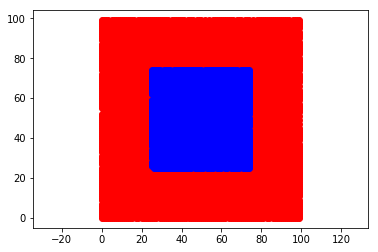

Iteration:  0
loss: 1.3819913
loss: 1.1253632
Training Accuracy: 0.7496667
Testing Accuracy: 0.753
Iteration:  1
loss: 1.3859568
loss: 1.1253961
Training Accuracy: 0.7496667
Testing Accuracy: 0.753
Iteration:  2
loss: 1.3803376
loss: 1.1253998
Training Accuracy: 0.7496667
Testing Accuracy: 0.753
Iteration:  3
loss: 1.3807875
loss: 1.1253998
Training Accuracy: 0.7496667
Testing Accuracy: 0.753
Iteration:  4
loss: 1.3834906
loss: 1.1253804
Training Accuracy: 0.7496667
Testing Accuracy: 0.753
Iteration:  5
loss: 1.3988521
loss: 1.1250587
Training Accuracy: 0.7496667
Testing Accuracy: 0.753
Iteration:  6
loss: 1.3789601
loss: 1.125397
Training Accuracy: 0.7496667
Testing Accuracy: 0.753
Iteration:  7
loss: 1.3834851
loss: 1.1253905
Training Accuracy: 0.7496667
Testing Accuracy: 0.753
Iteration:  8
loss: 1.3865136
loss: 1.1253997
Training Accuracy: 0.7496667
Testing Accuracy: 0.753
Iteration:  9
loss: 1.3849233
loss: 1.1253043
Training Accuracy: 0.7496667
Testing Accuracy: 0.753
Iteration: 

In [39]:
data_x, data_y, shape = extract_data('block_in_middle.txt', num_labels)
print(shape)
# Randomly take 1000 pixels to test on. The training set is only 9000
train_x, train_y, test_x, test_y = create_training_and_testing_sets(data_x, data_y, shape, 1000 )
draw_image(train_x)

for i in range(20):
    print("Iteration: ", i )
    x, y, init, train_op, loss, accuracy = build_model()
    run(x, y, init, train_op, loss, accuracy, train_x, train_y, test_x, test_y )

#TO DO#
When doing the real data, user id is kinda useless. You want to have a vector instead that is the embedding of the user, such as interactions of the user and information about the user. Maybe the top projects they participated in or their relation to other users.
TAke a small sample square of the data with a few pictures in it.
Read the paper and make it better
Clean and organize the notebook

If i given all the updates, how do i cluster them so that they form the images
EX: from 10000 updates, 100 images were built. Then i will train my model and be able to tell if it can perfectly find the images

Try to print out the weights. Look at the berkeely example and the cmu video again.